
# Analisi Covid_19 

##### Analisi a livello regionale:
* Ogni regione grafico singolo
* Grafico regionale:
    * Mortalità
    * Nuovi positivi
    * Casi totali
    * Terapia Intensiva
    * Dimessi Guariti
    * Isolamento domiciliare
    * Deceduti
##### Analisi a livello nazionale
* Grafico Nazionale:
    * Casi totali
    * Nuovi positivi
    * Totale guariti
    * Deceduti

#### TODO:
* Riformattare codice e pulirlo
* Scrivere un Readme.md come si deve
* Creare modello per prevedere andamento curva

In [21]:
# Importo librerie

import pandas as pd
import matplotlib.pyplot as plt
import pylab

# Importo i vari .csv

df = pd.read_csv('COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv')
df_nazionale = pd.read_csv('COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
df_cina = pd.read_csv('full_data.csv')

In [22]:
# Lista regioni

regione_tot = ['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania', 'Emilia Romagna', 
               'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 
               'Sardegna', 'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta", 'Veneto'
]

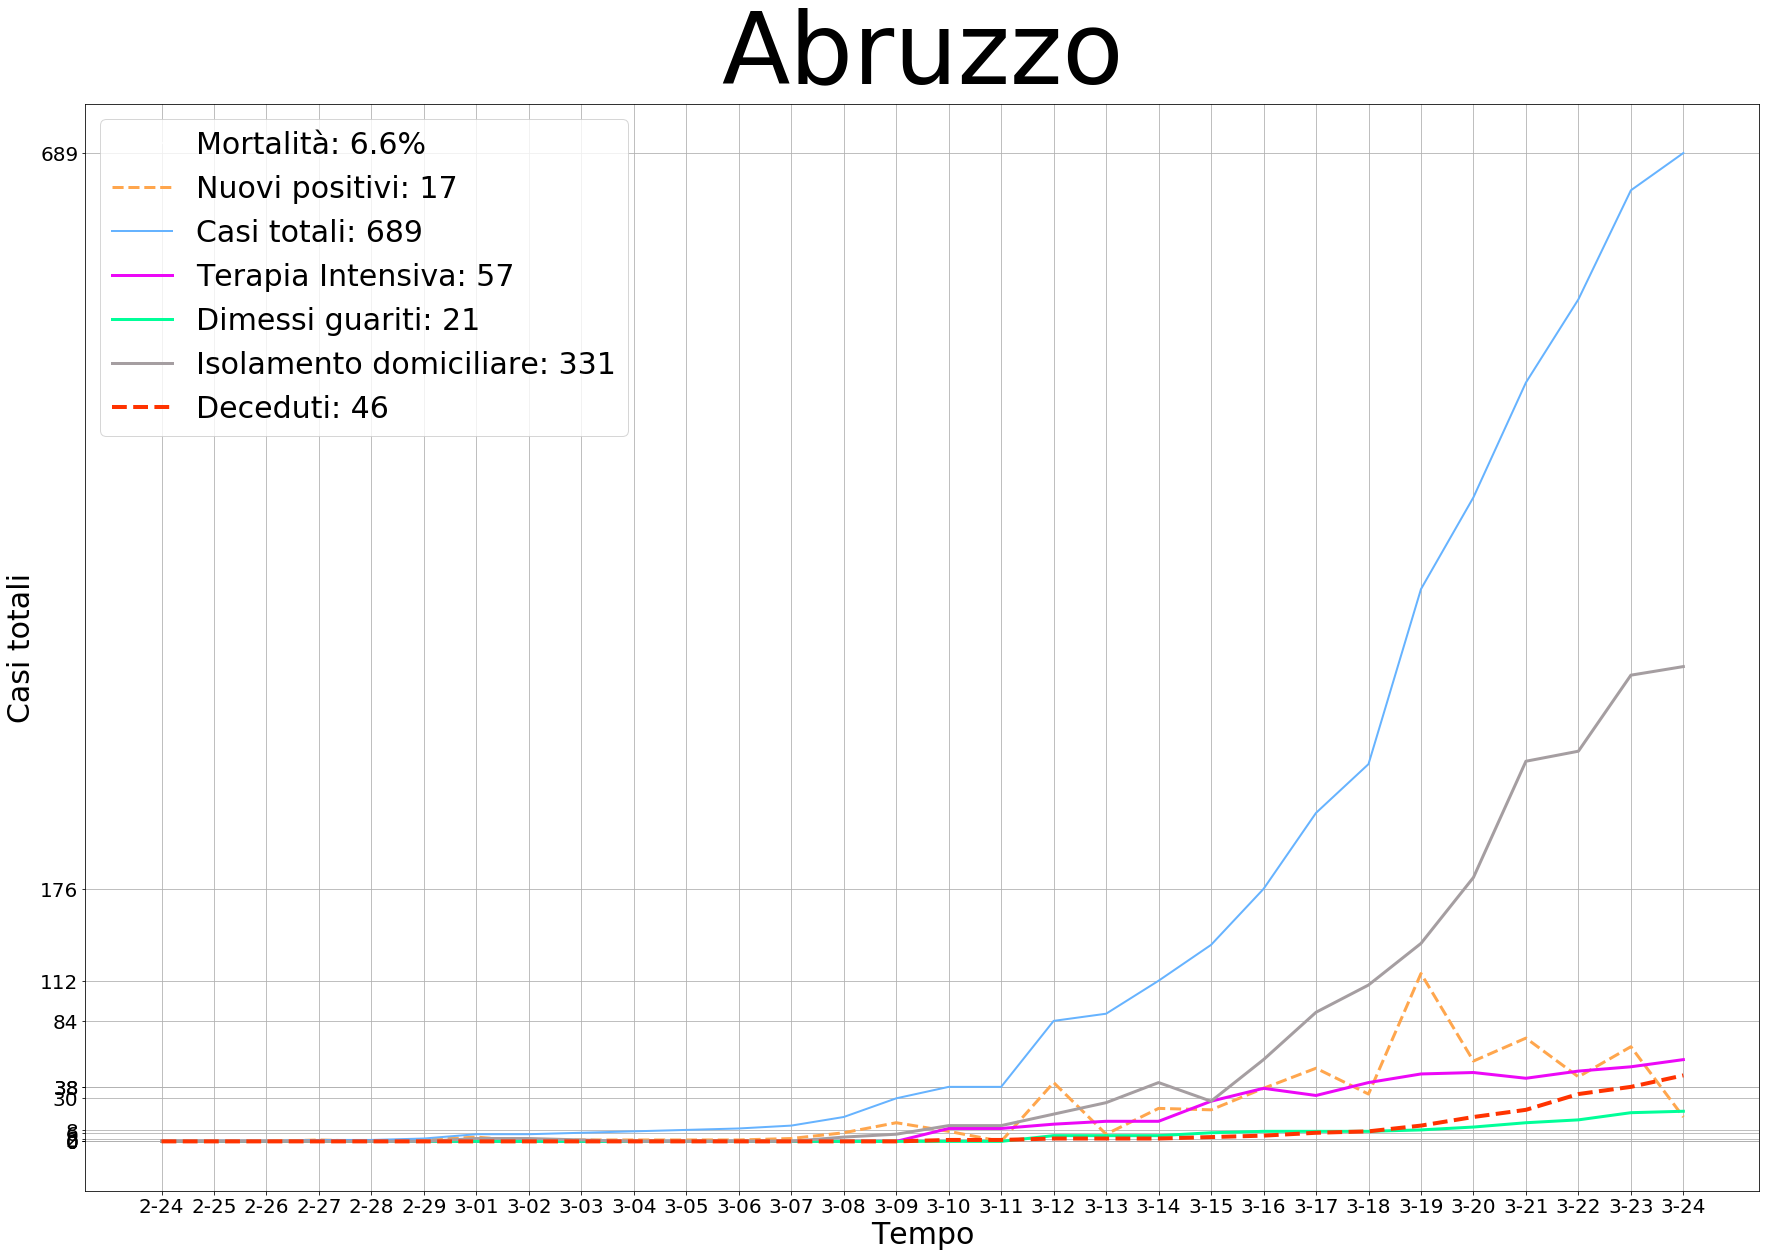

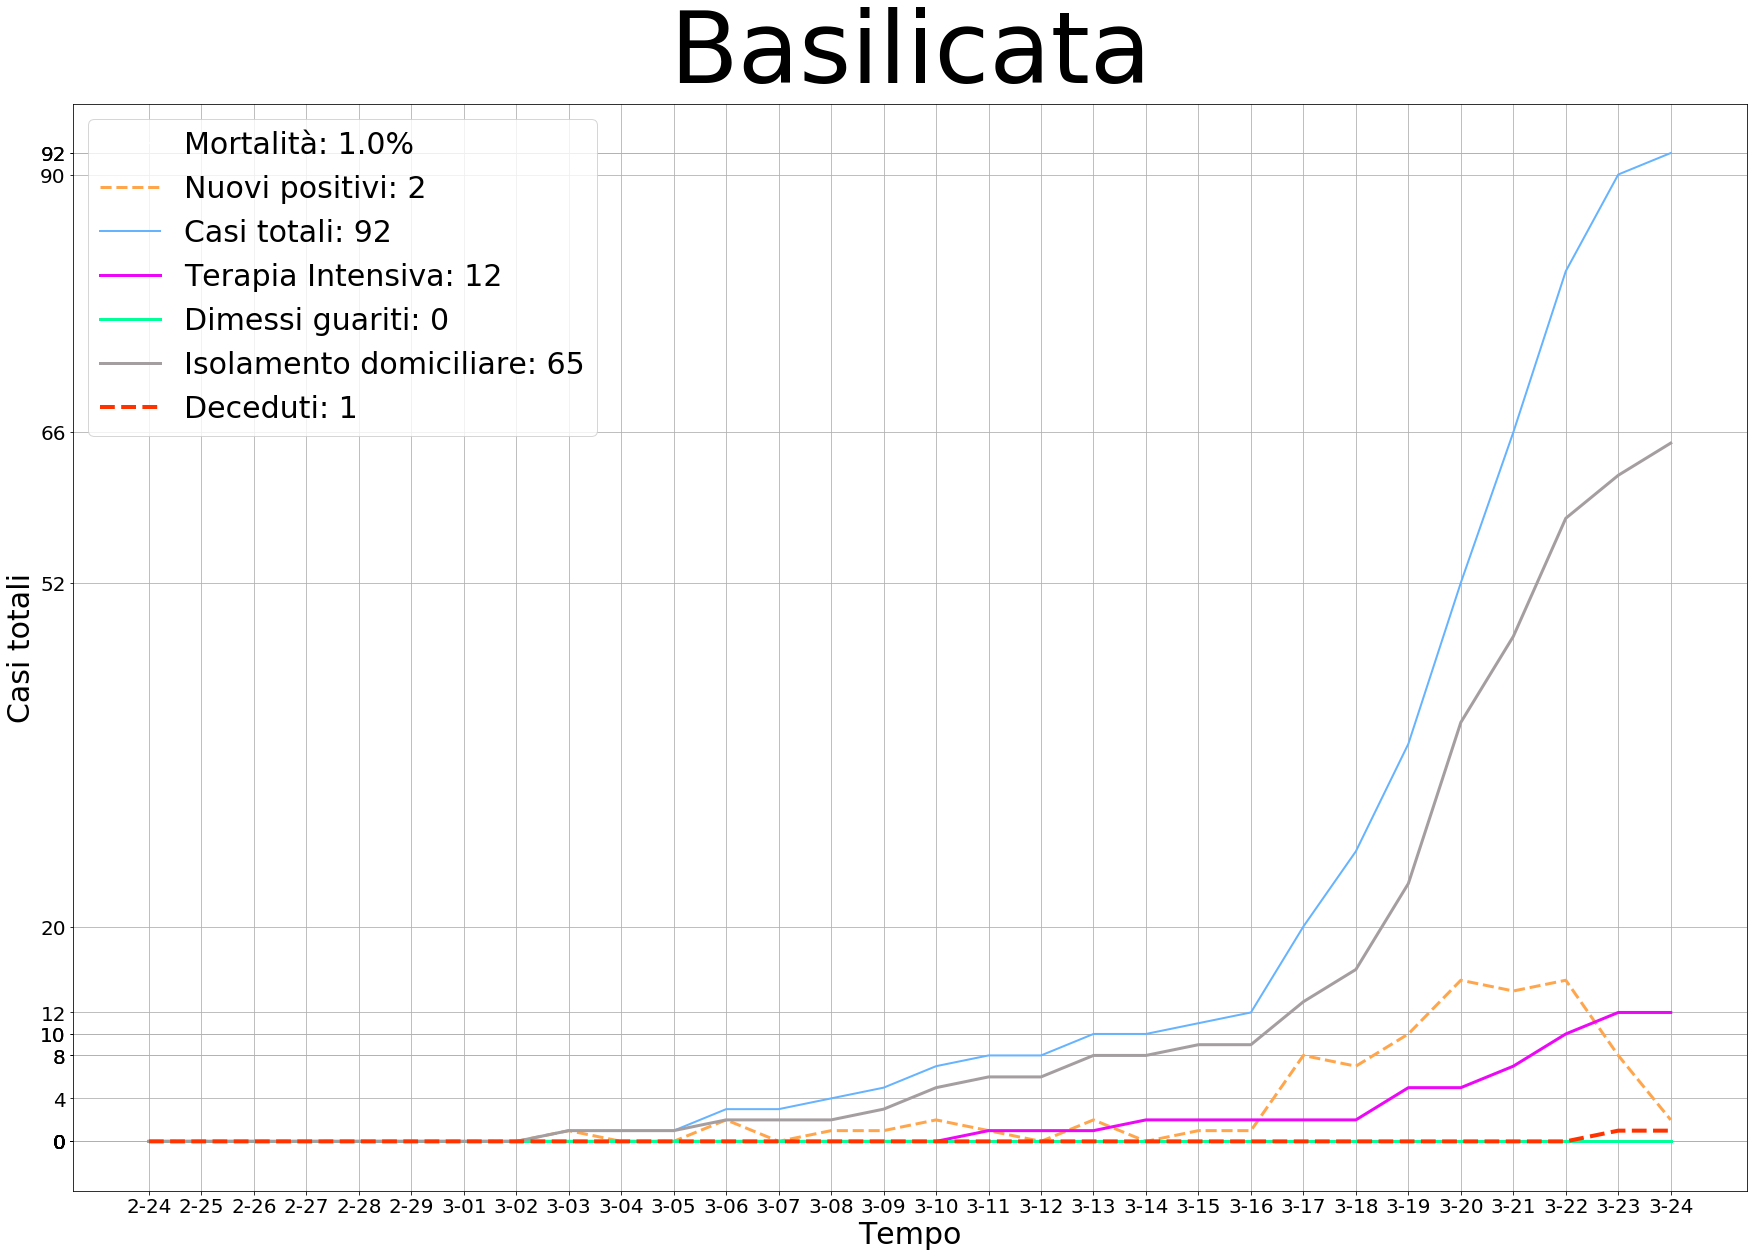

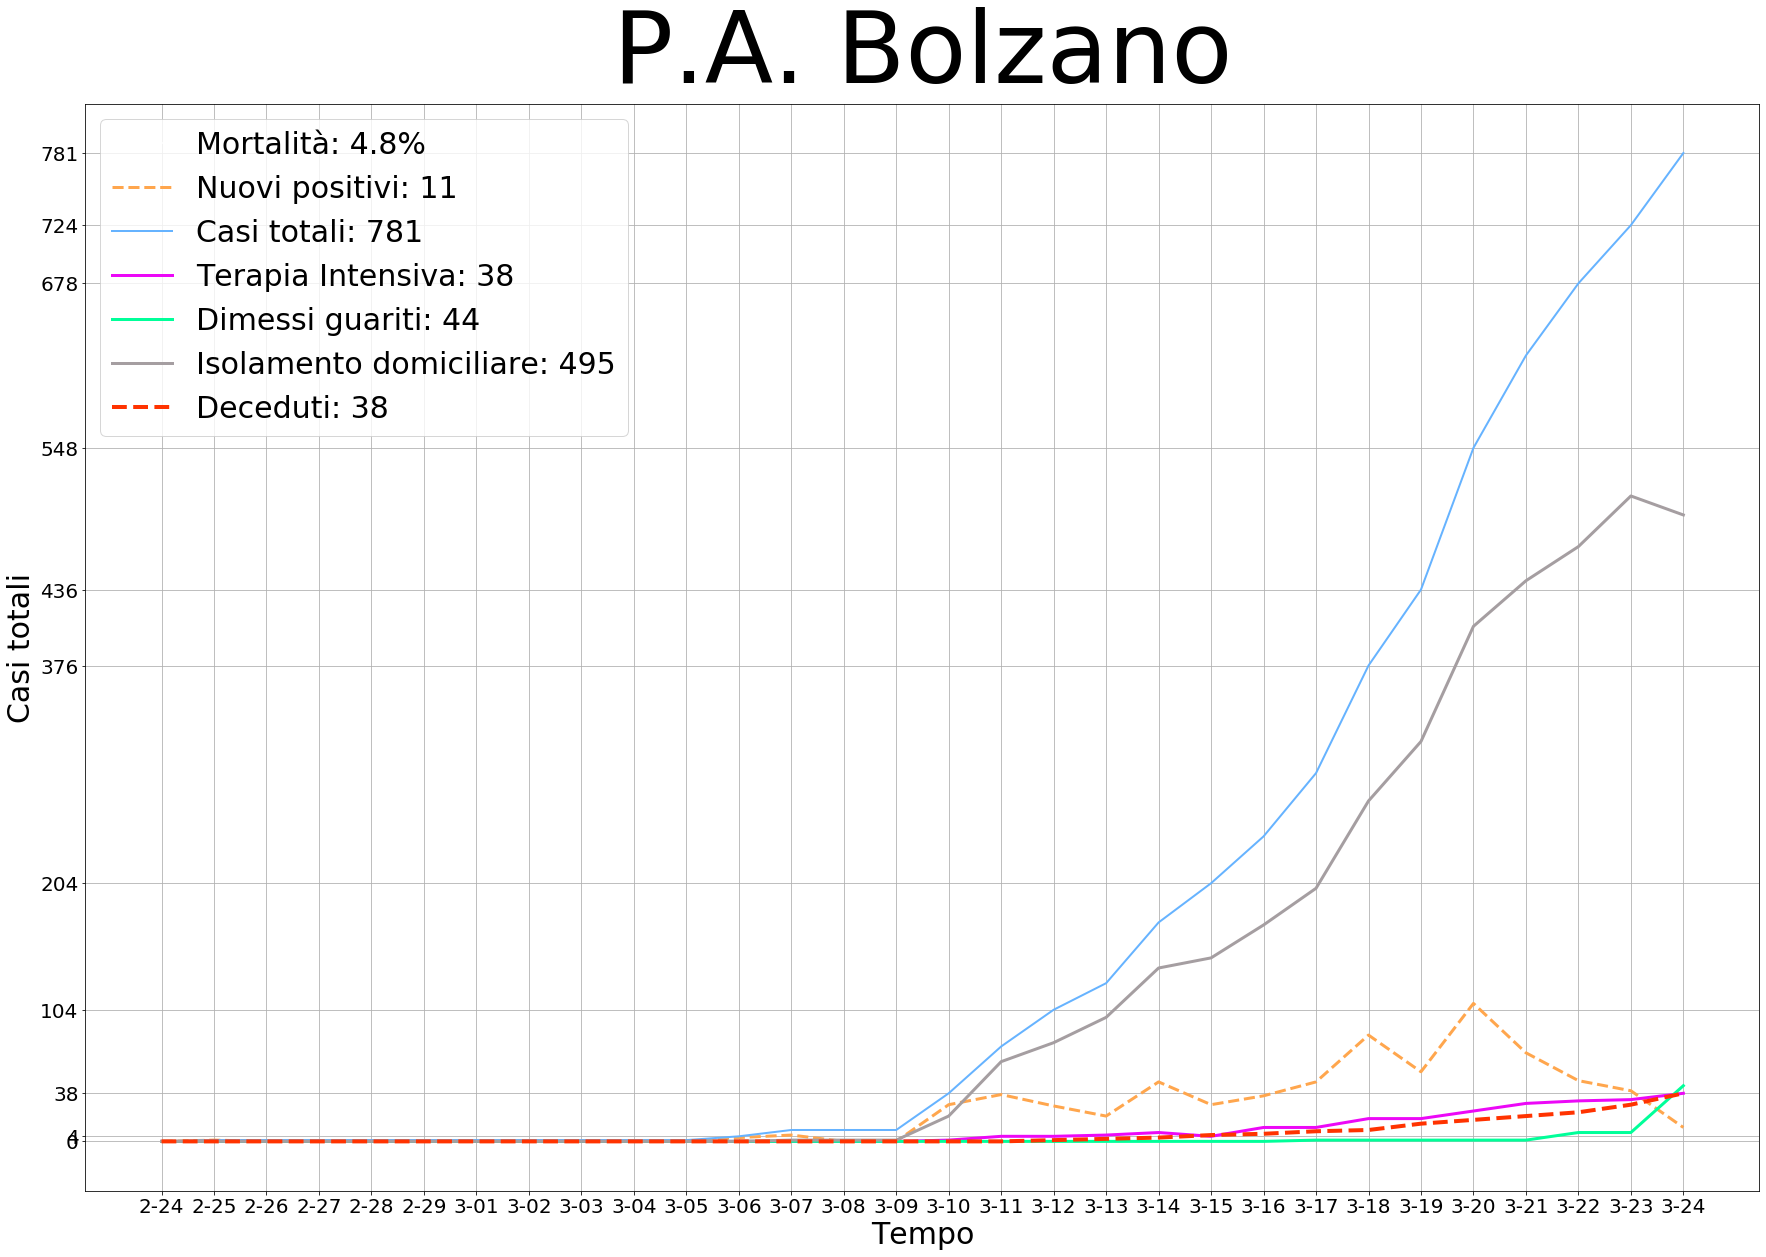

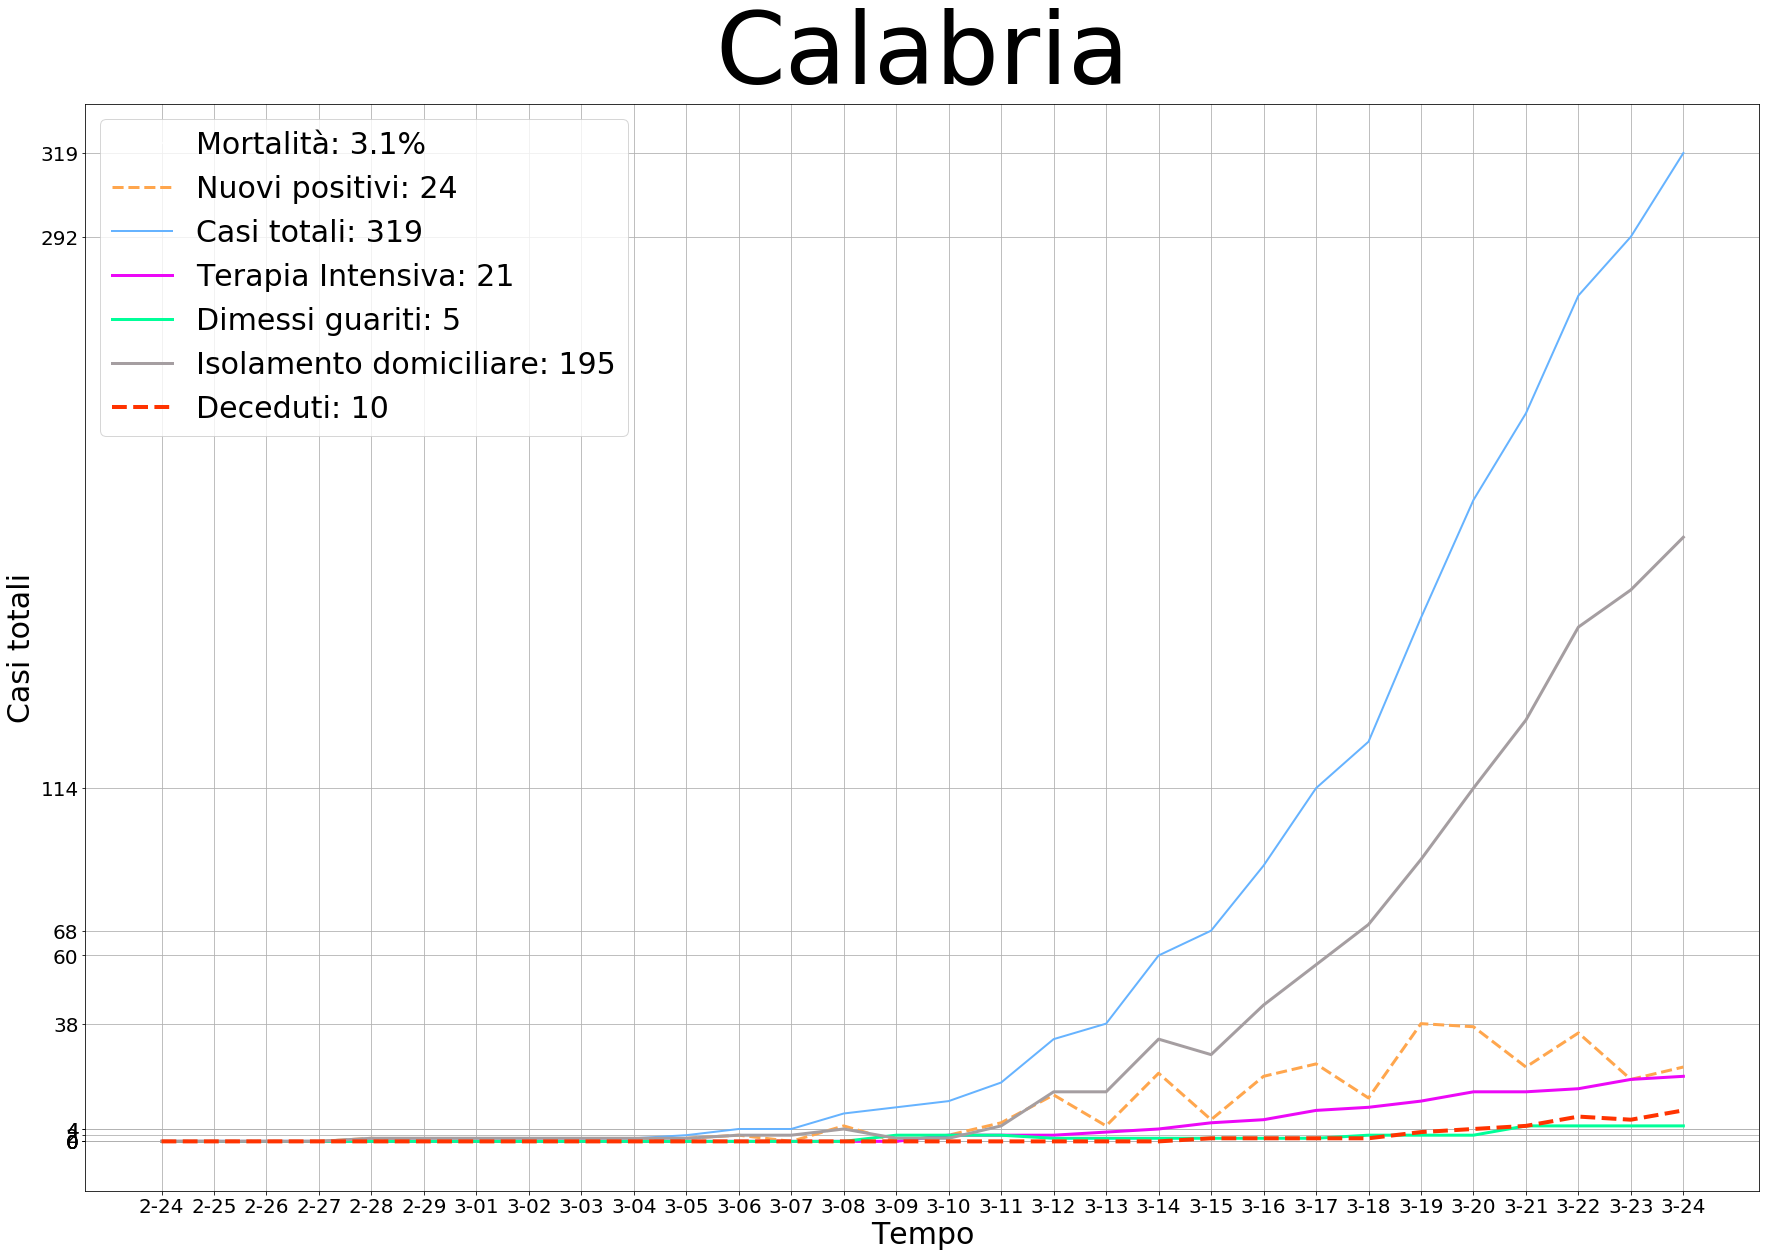

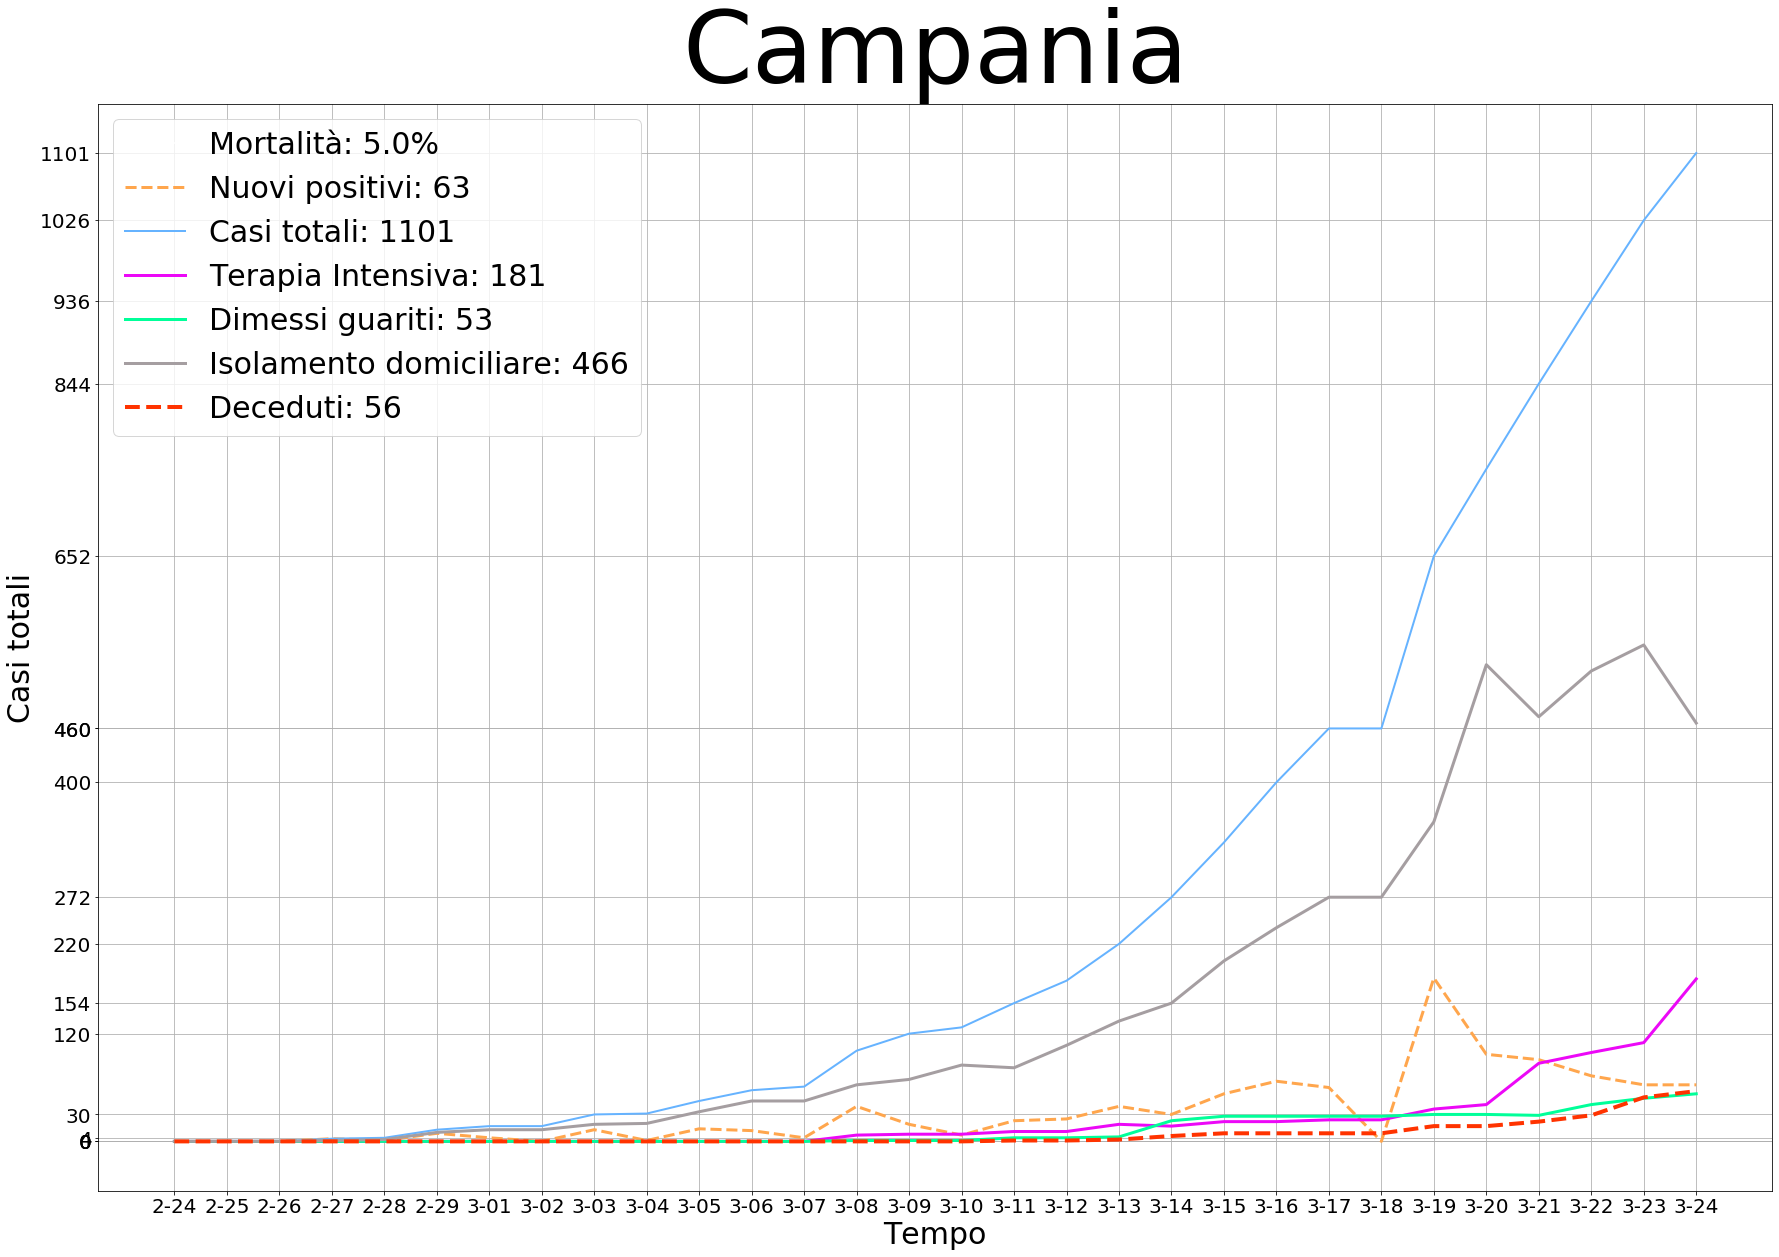

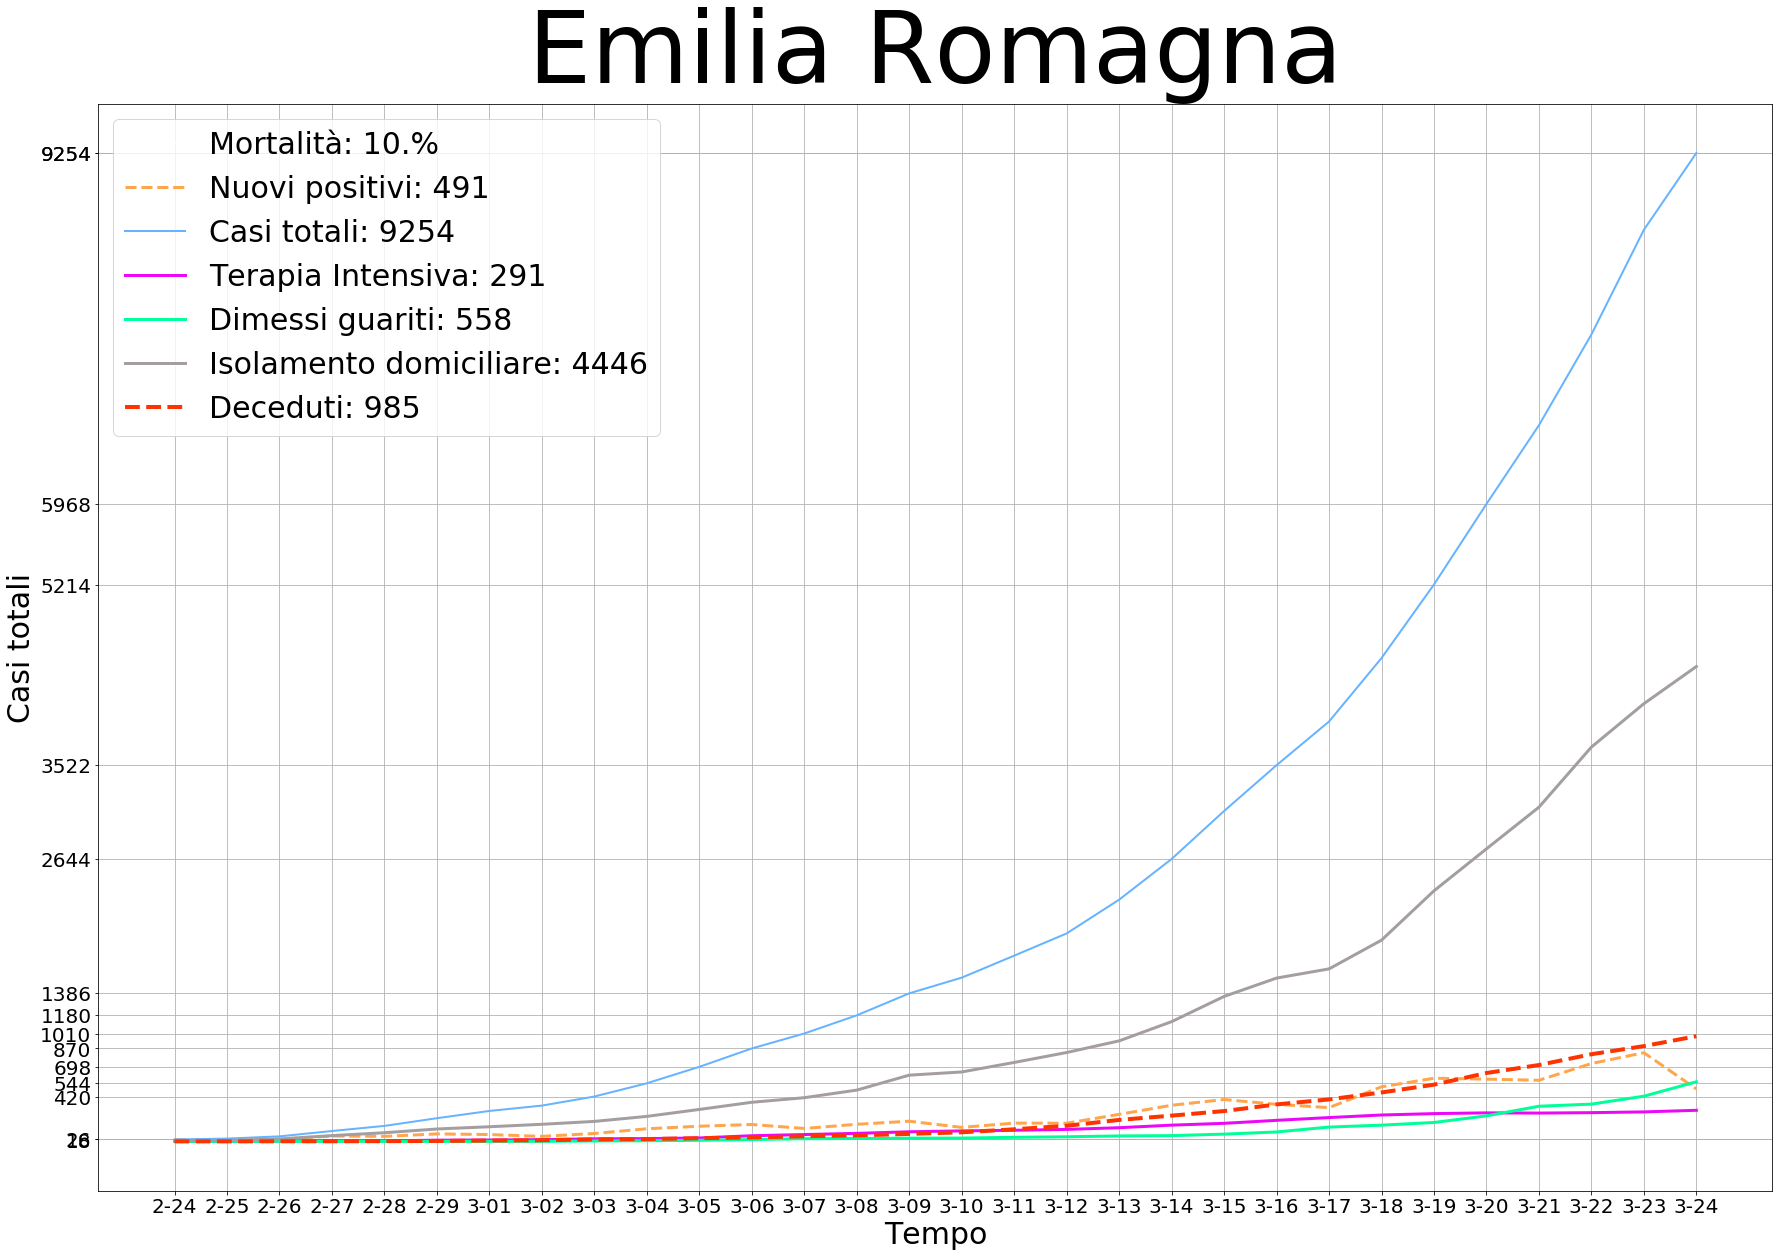

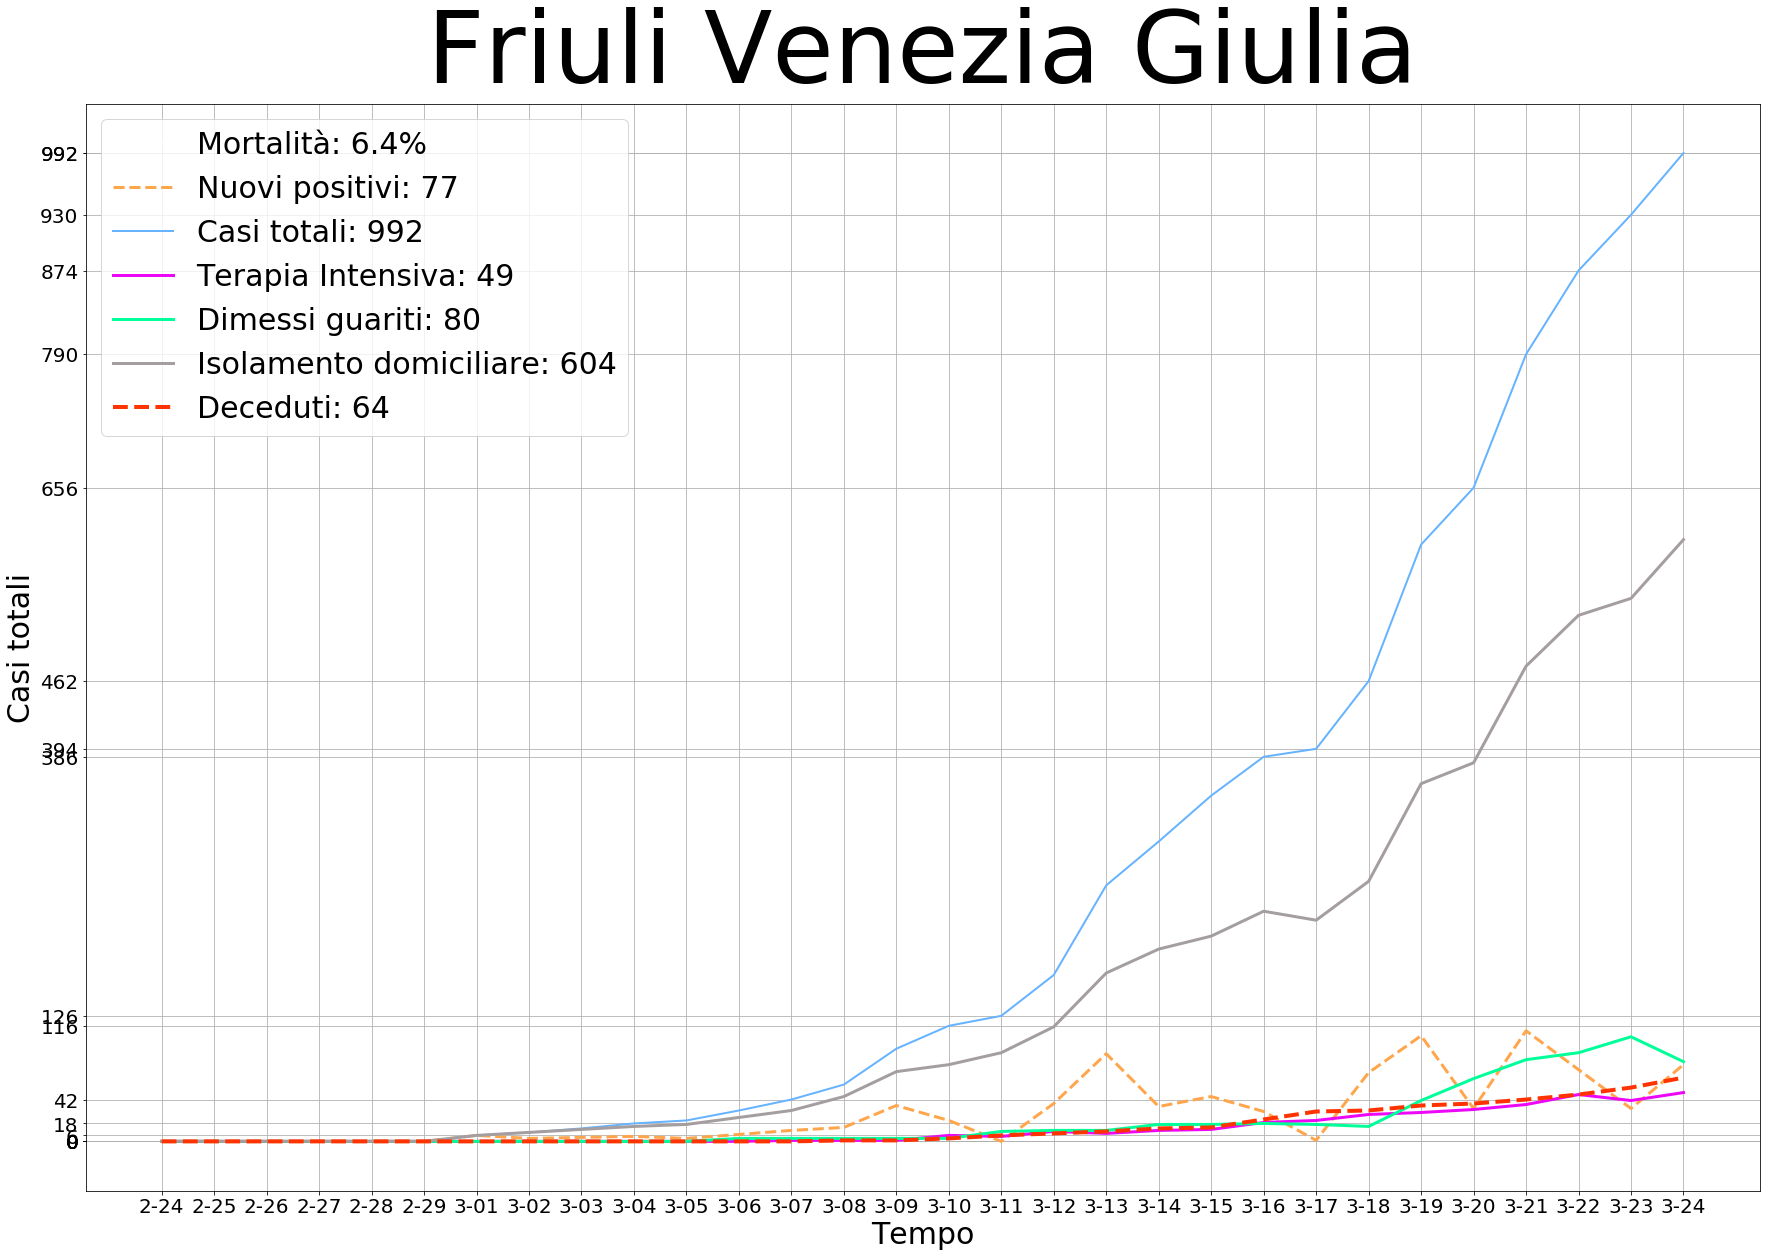

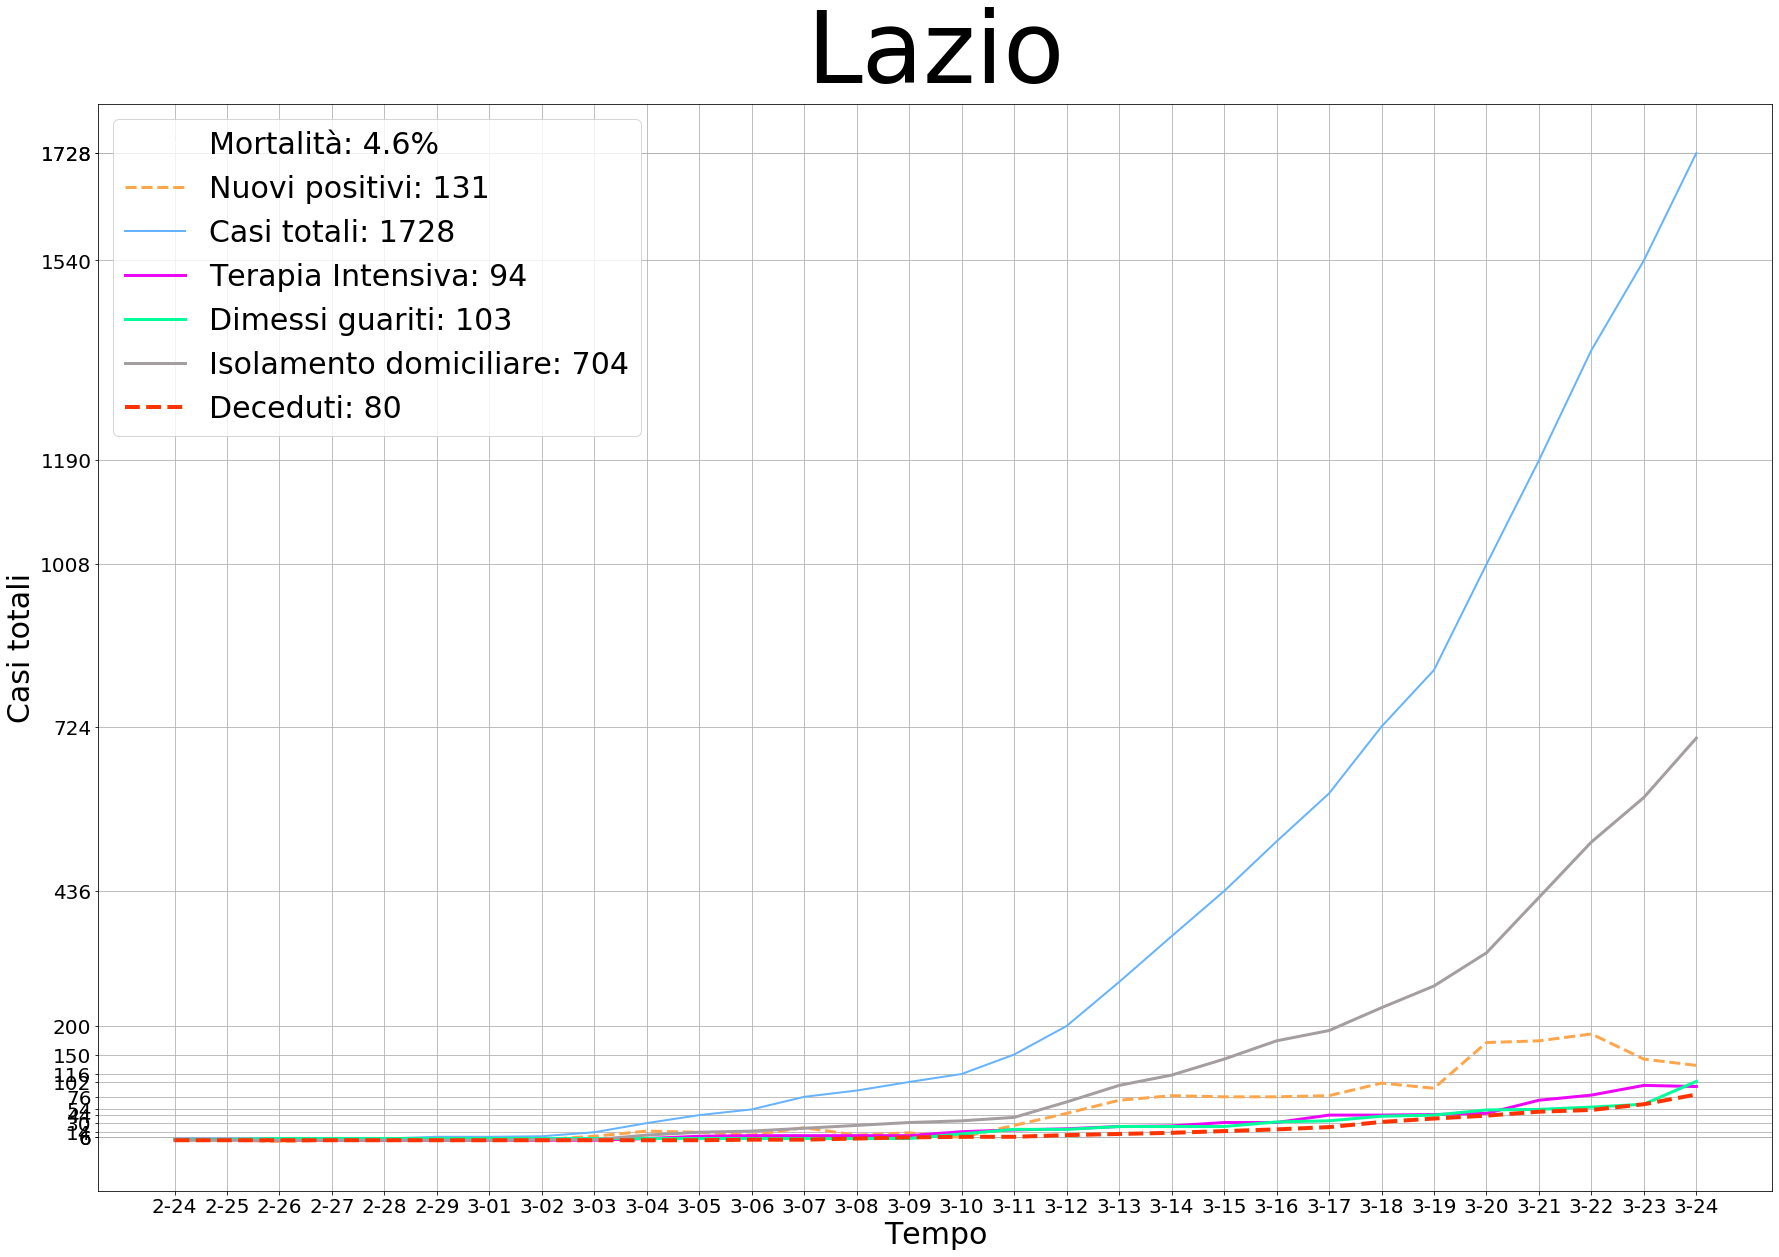

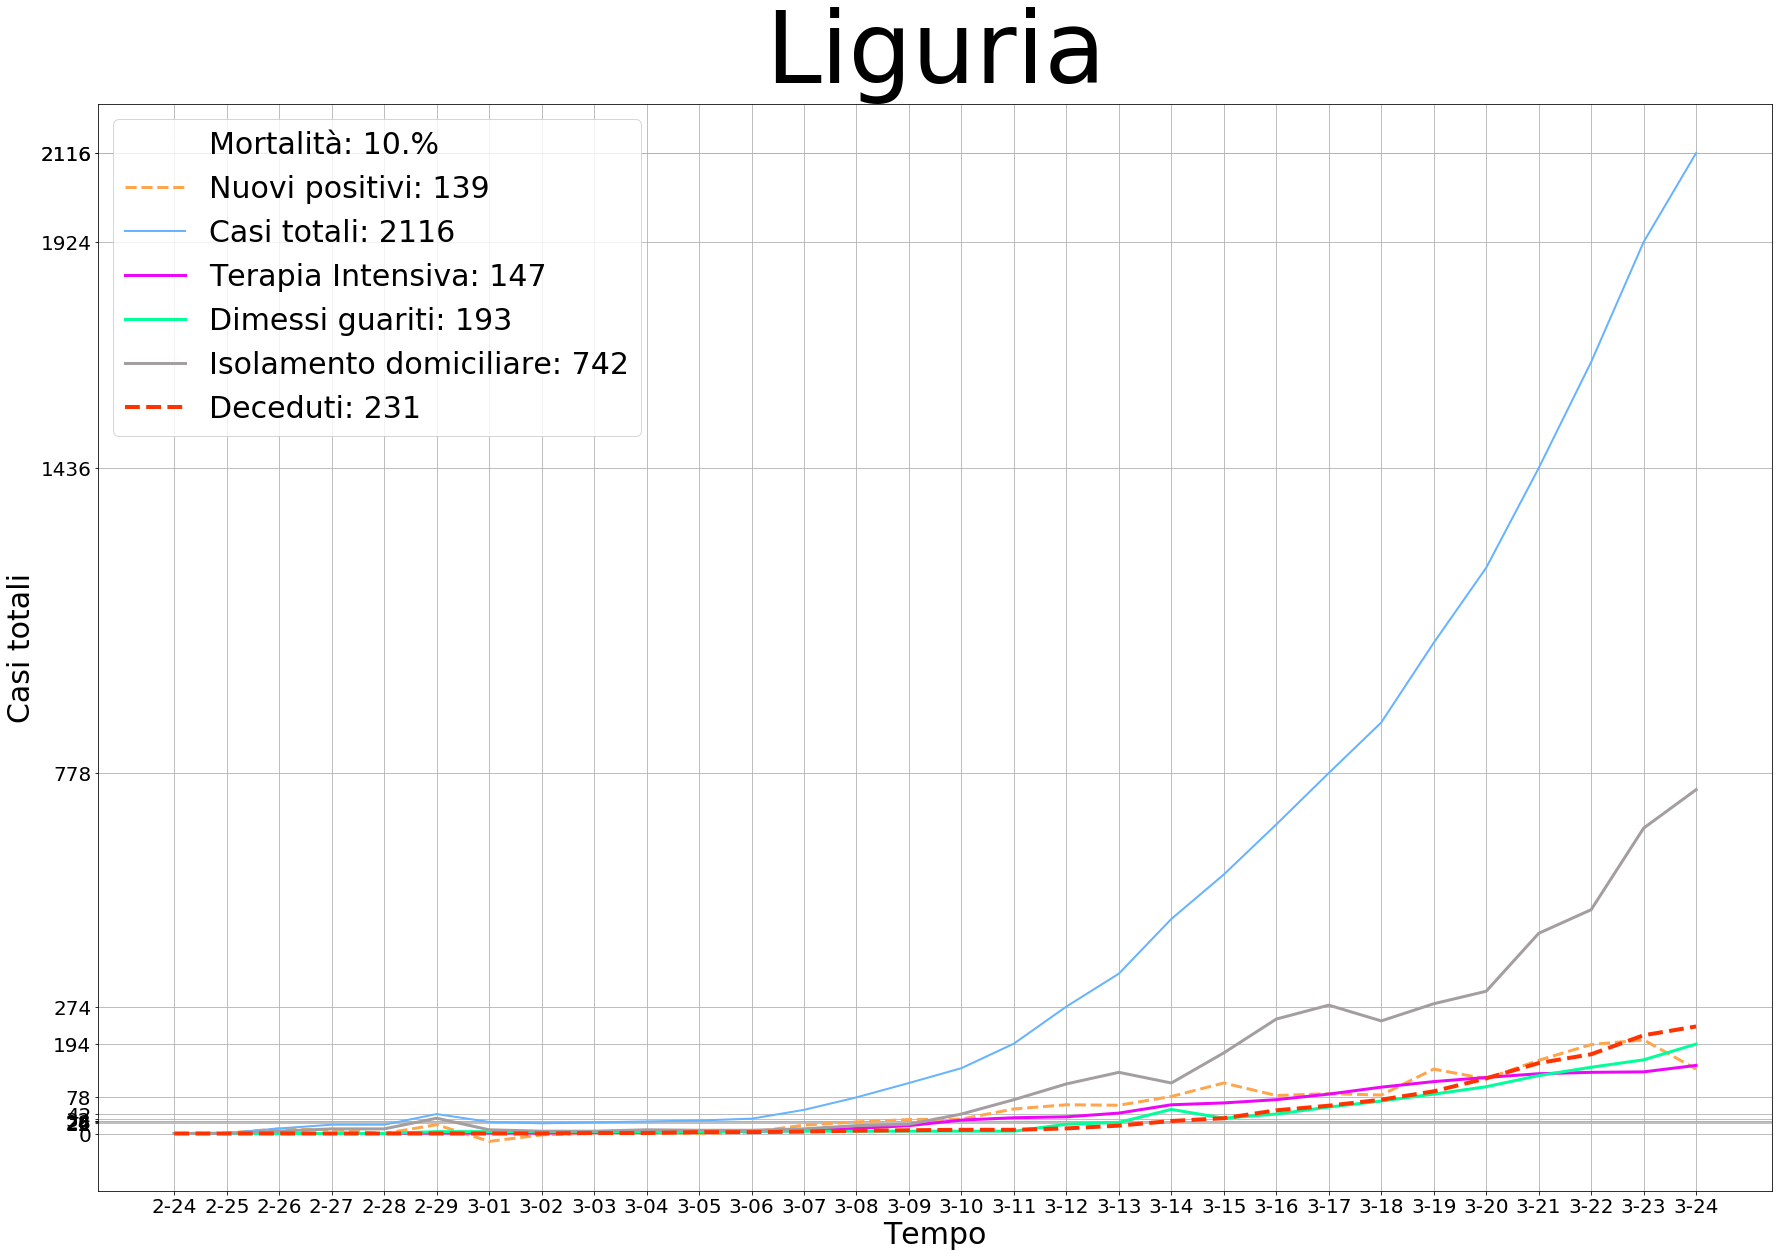

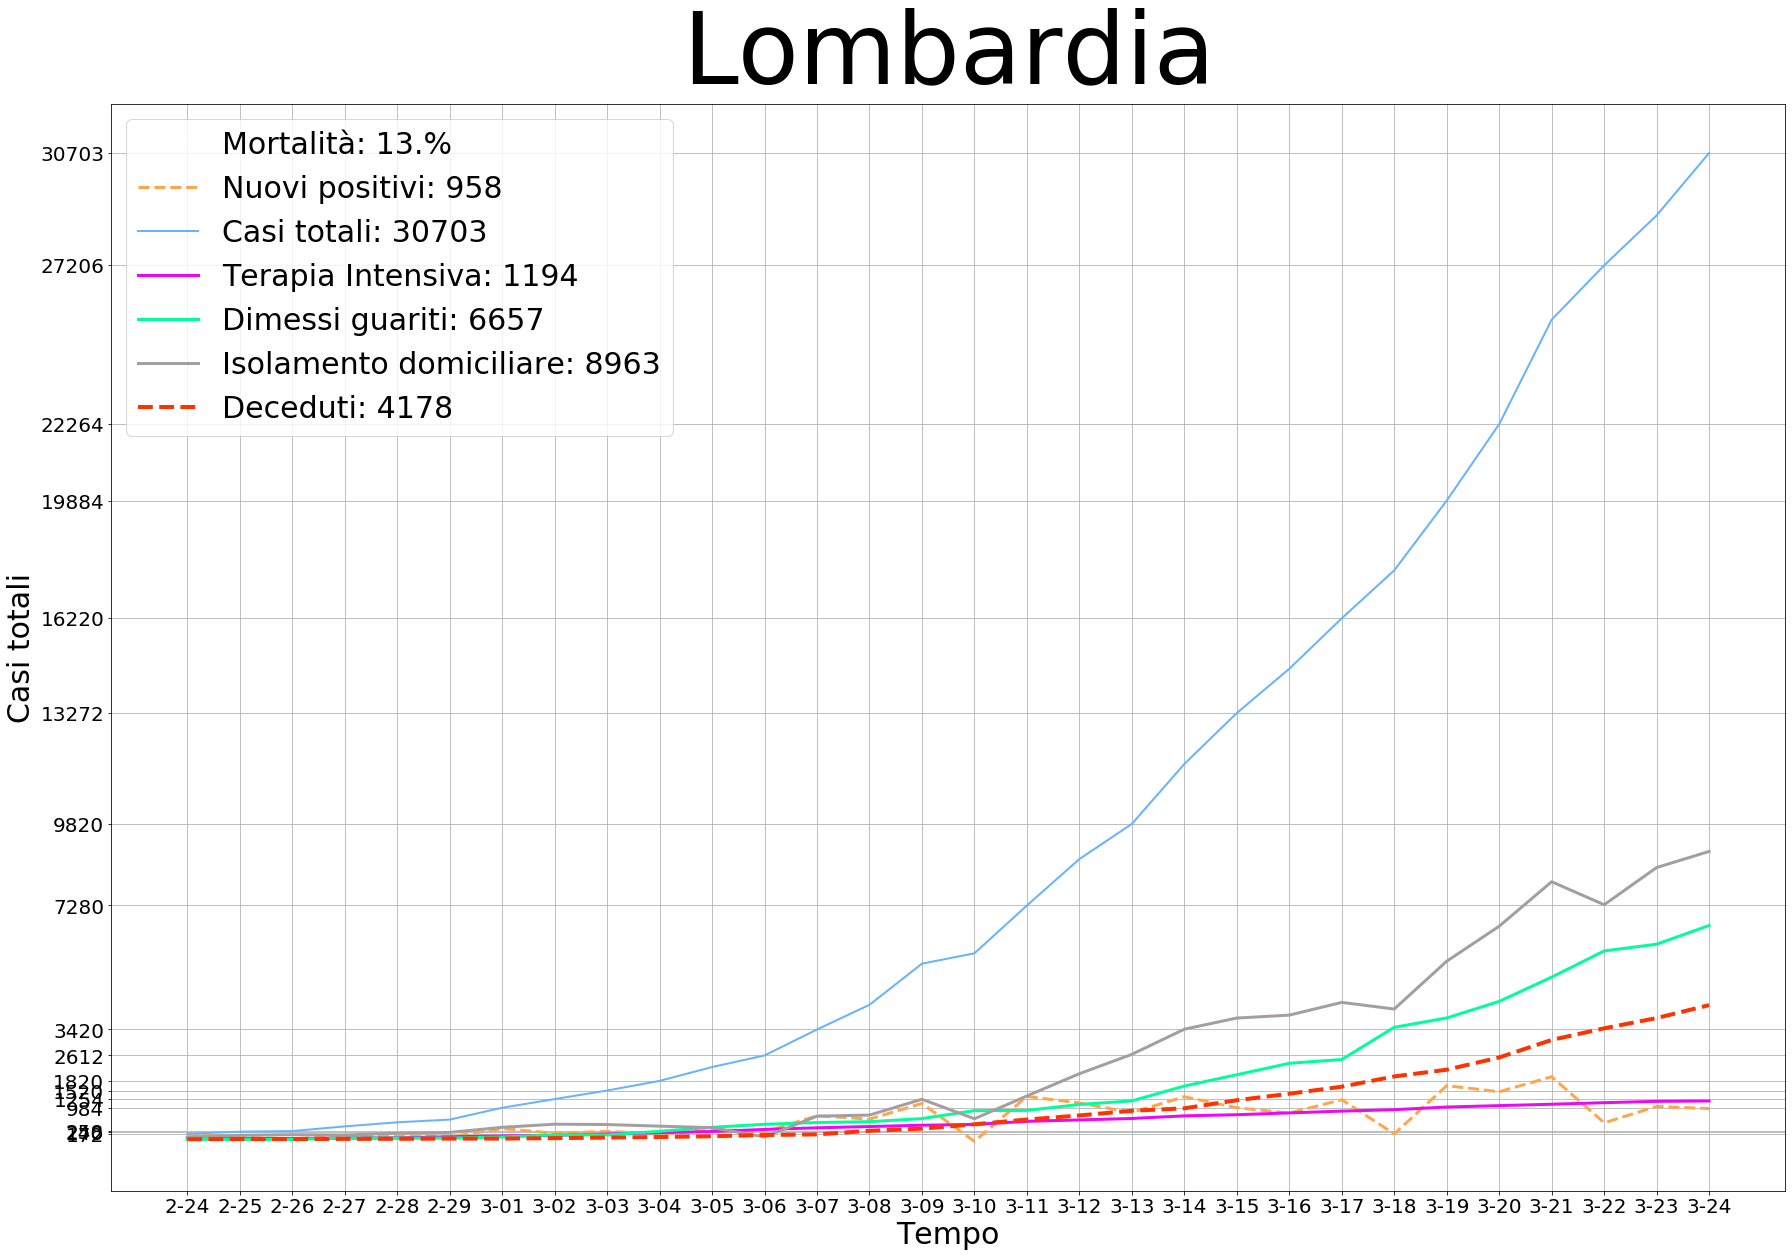

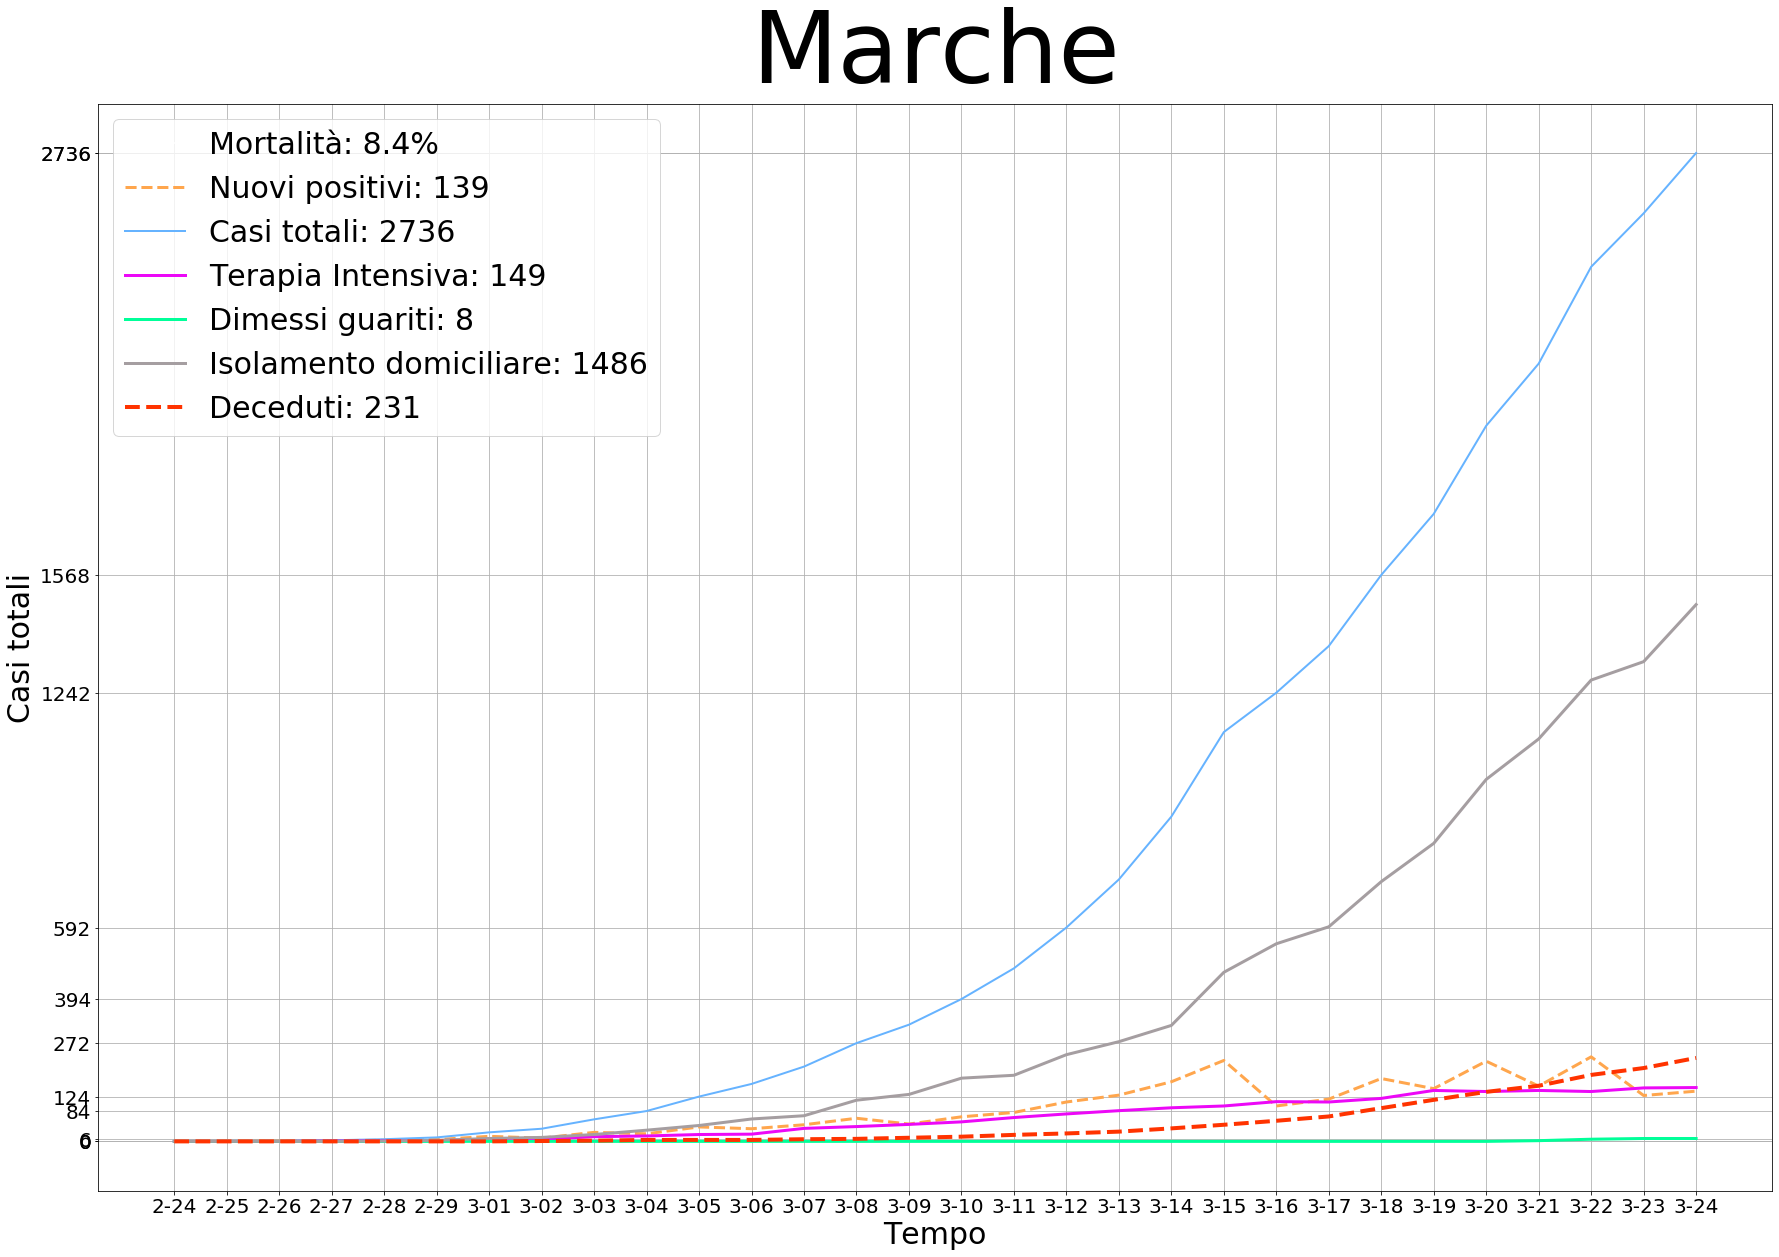

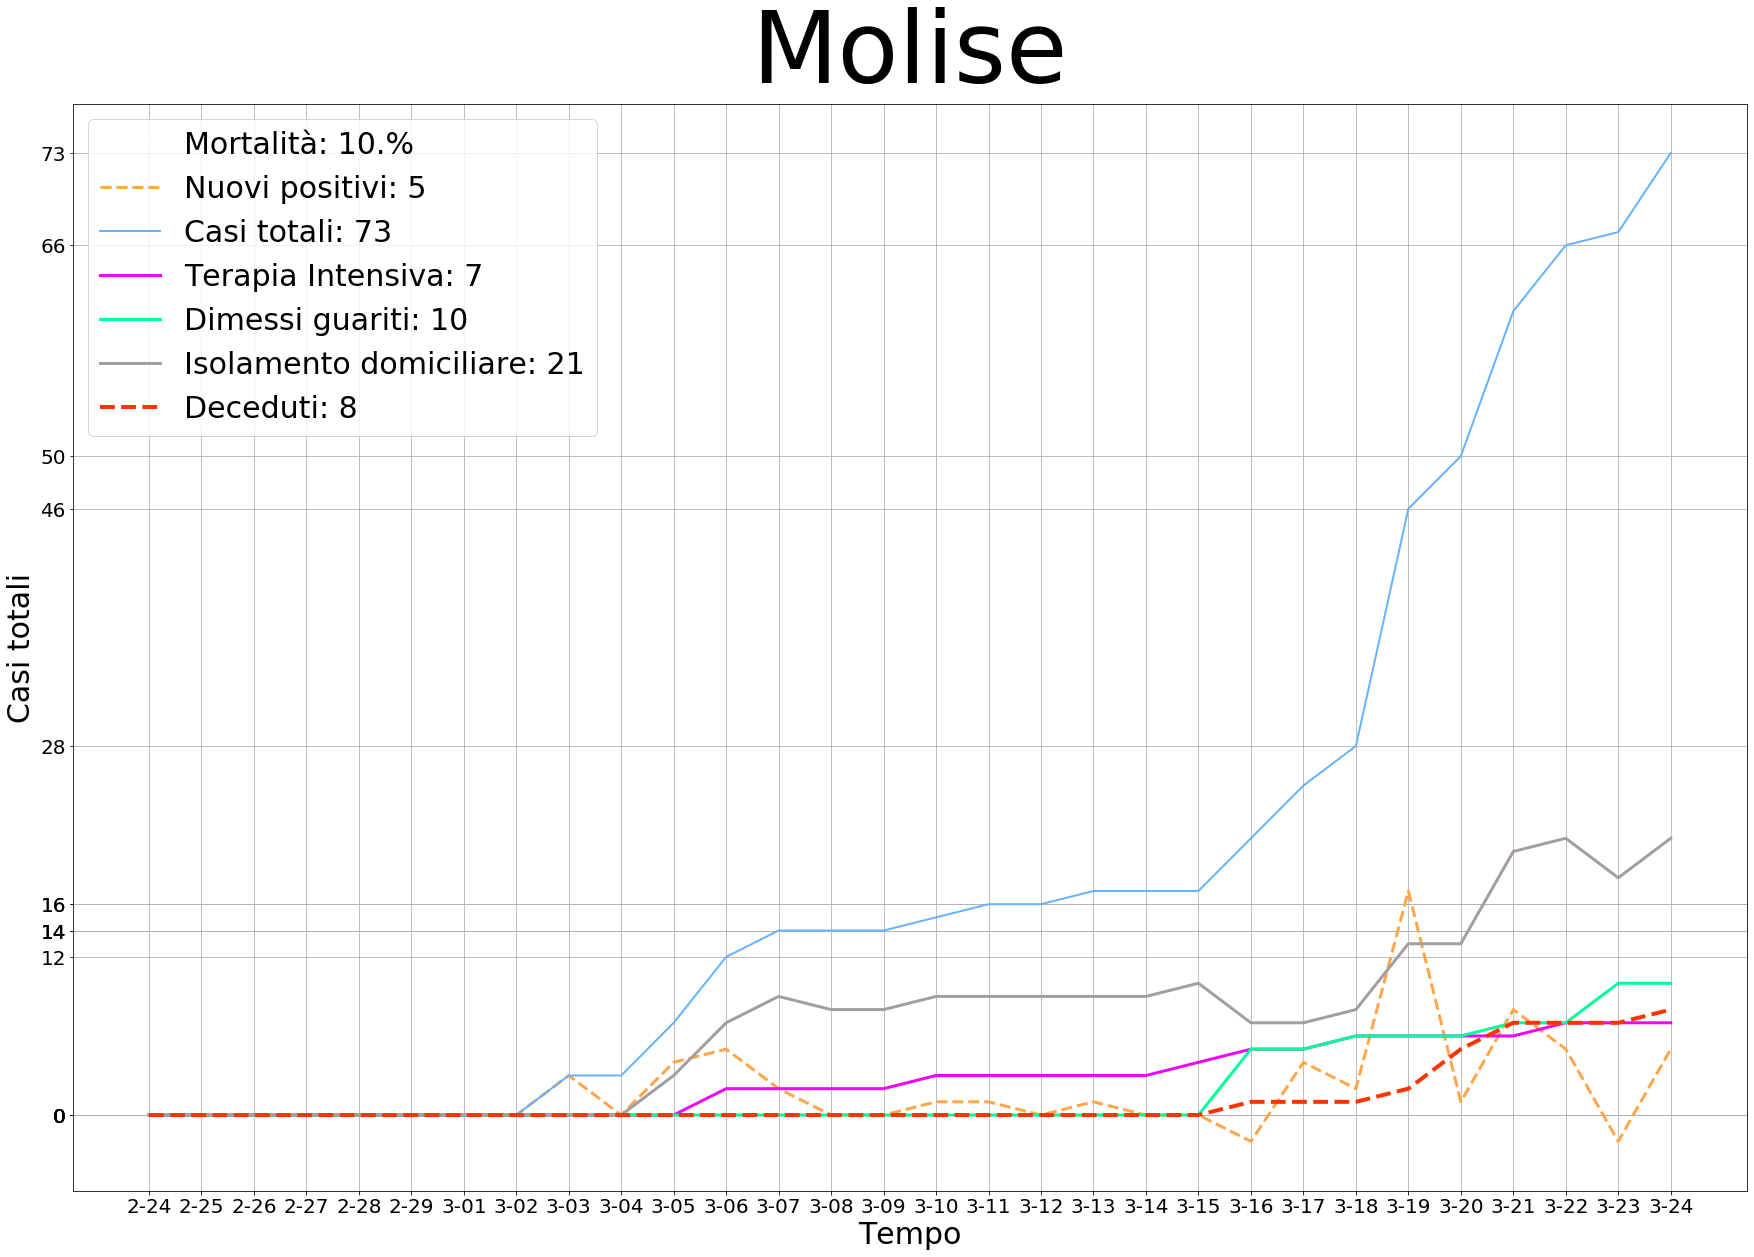

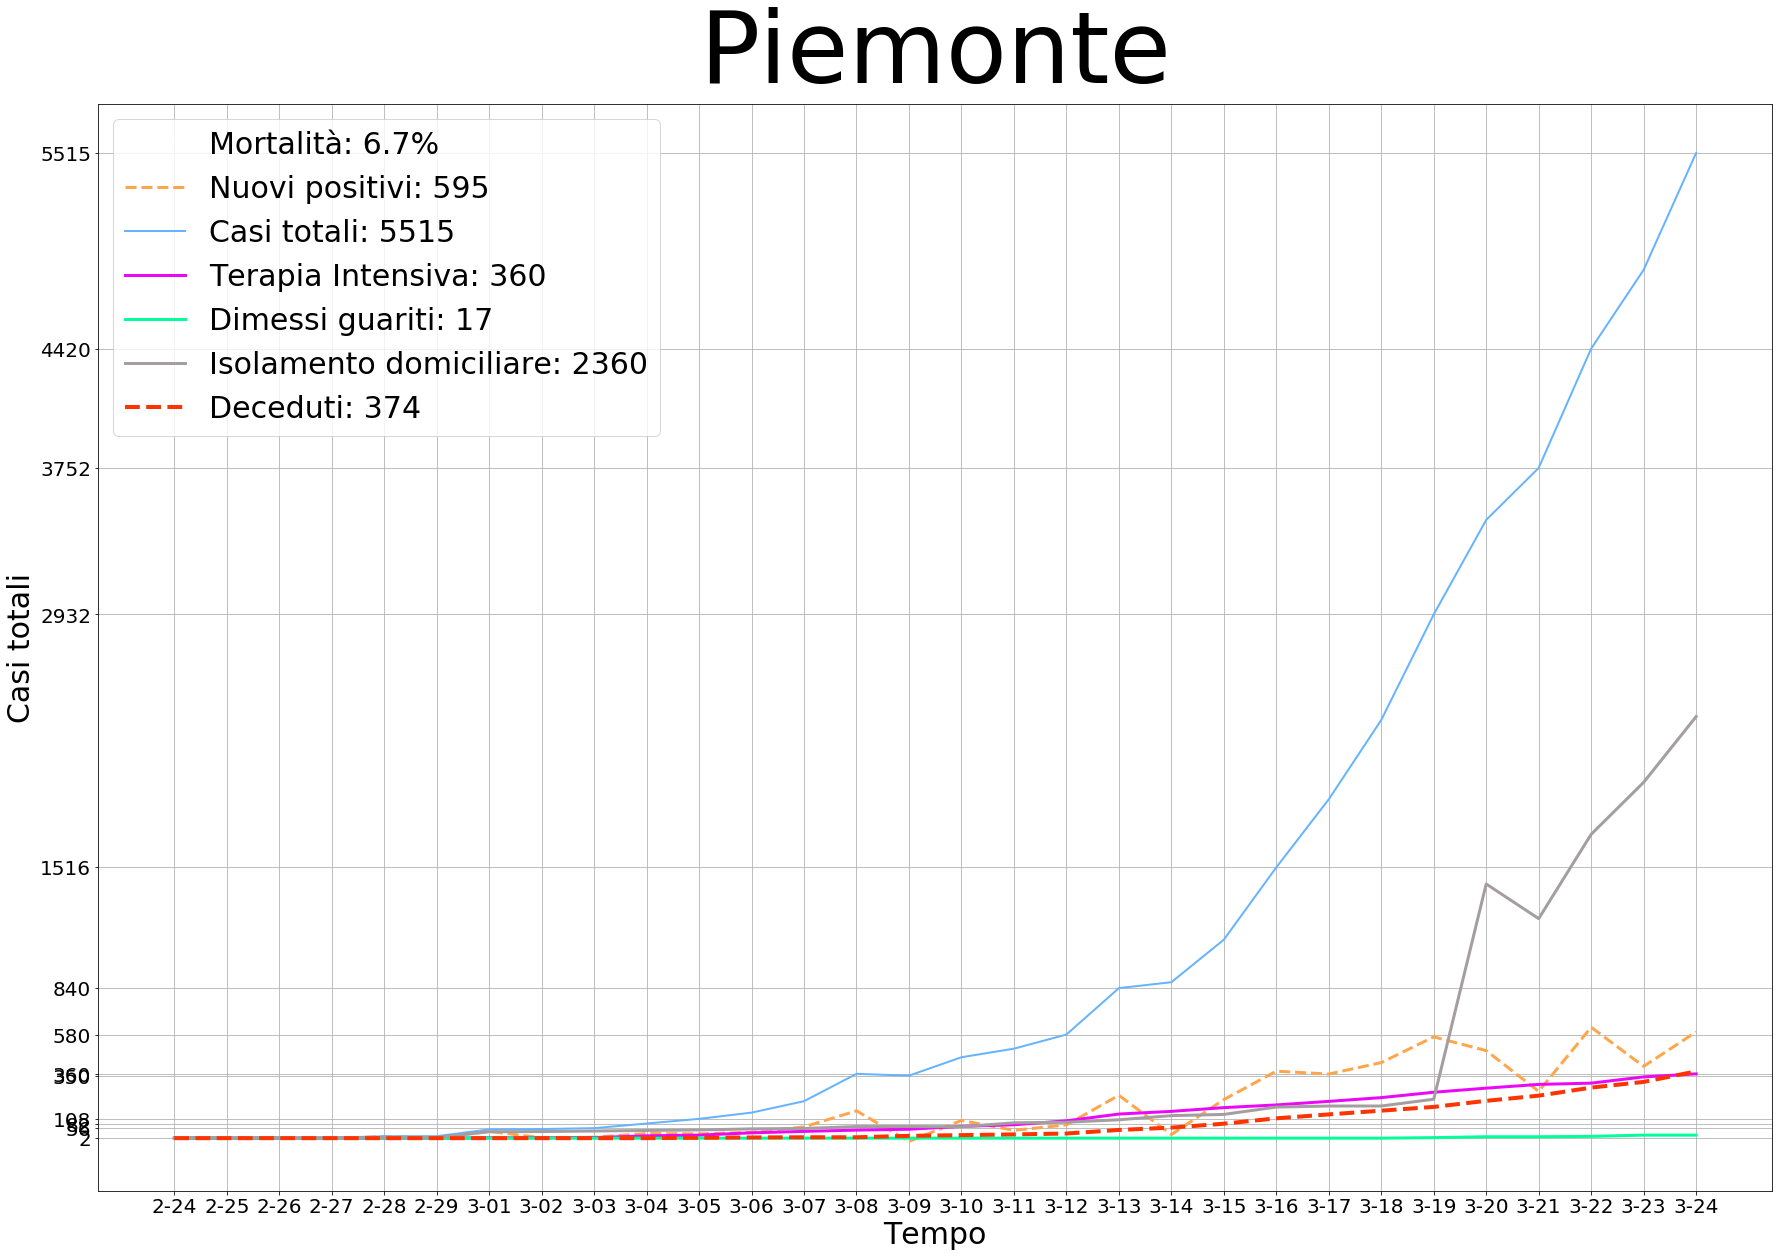

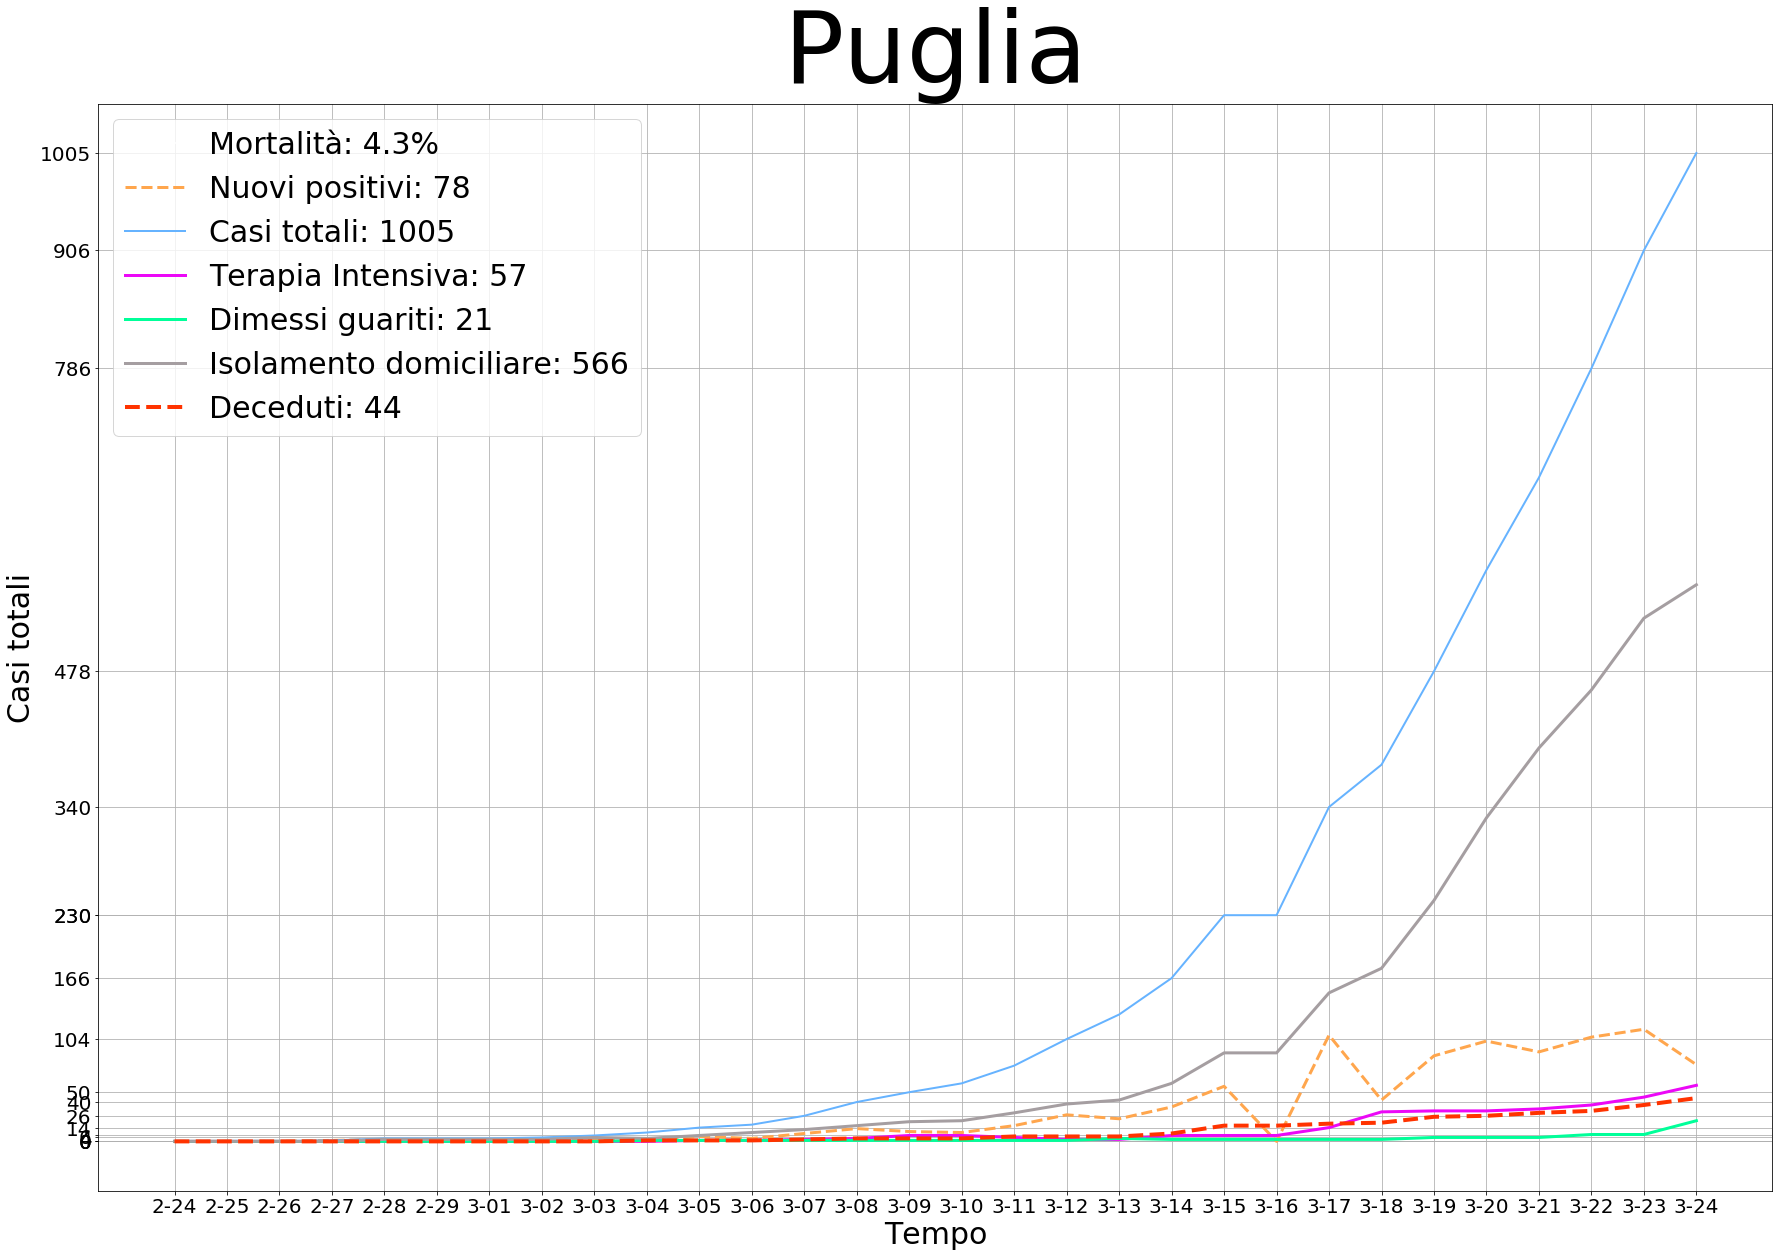

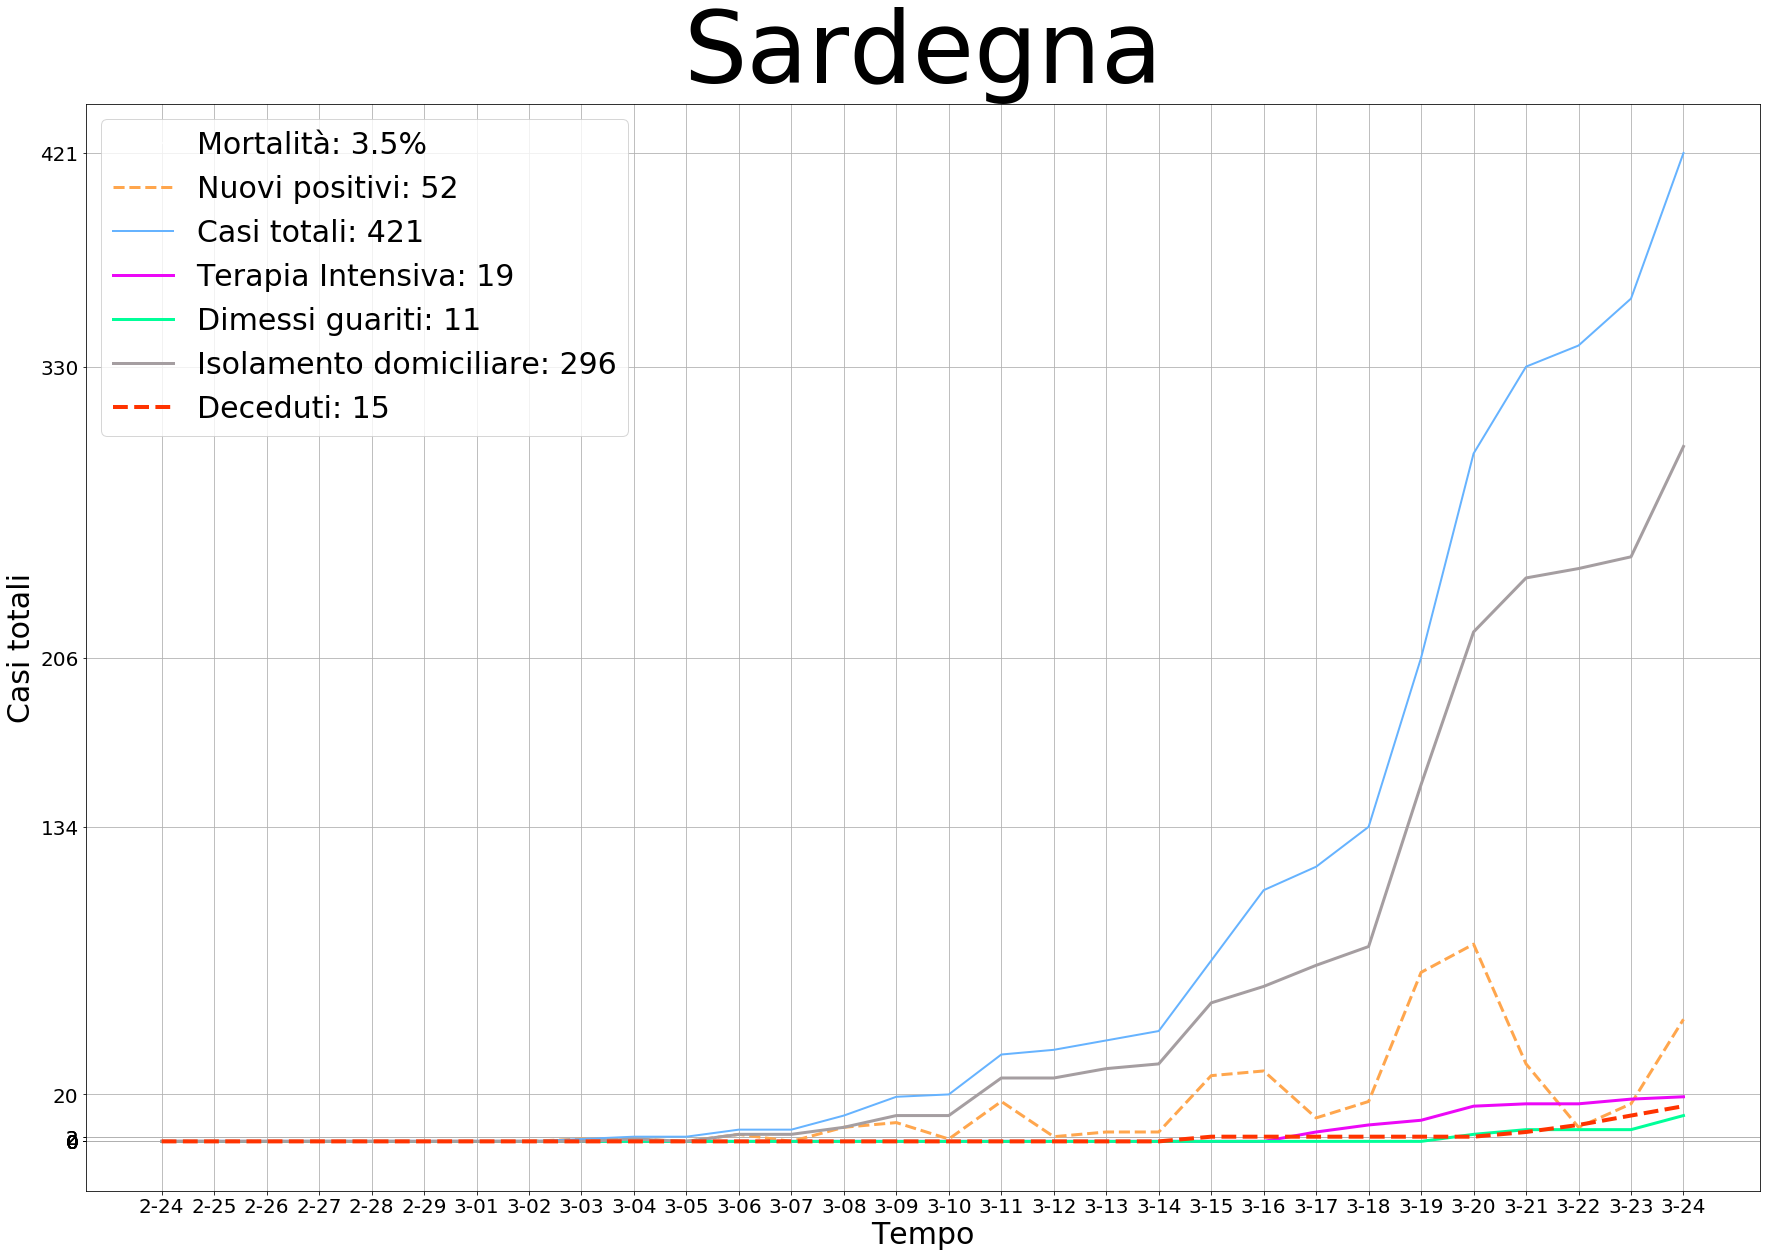

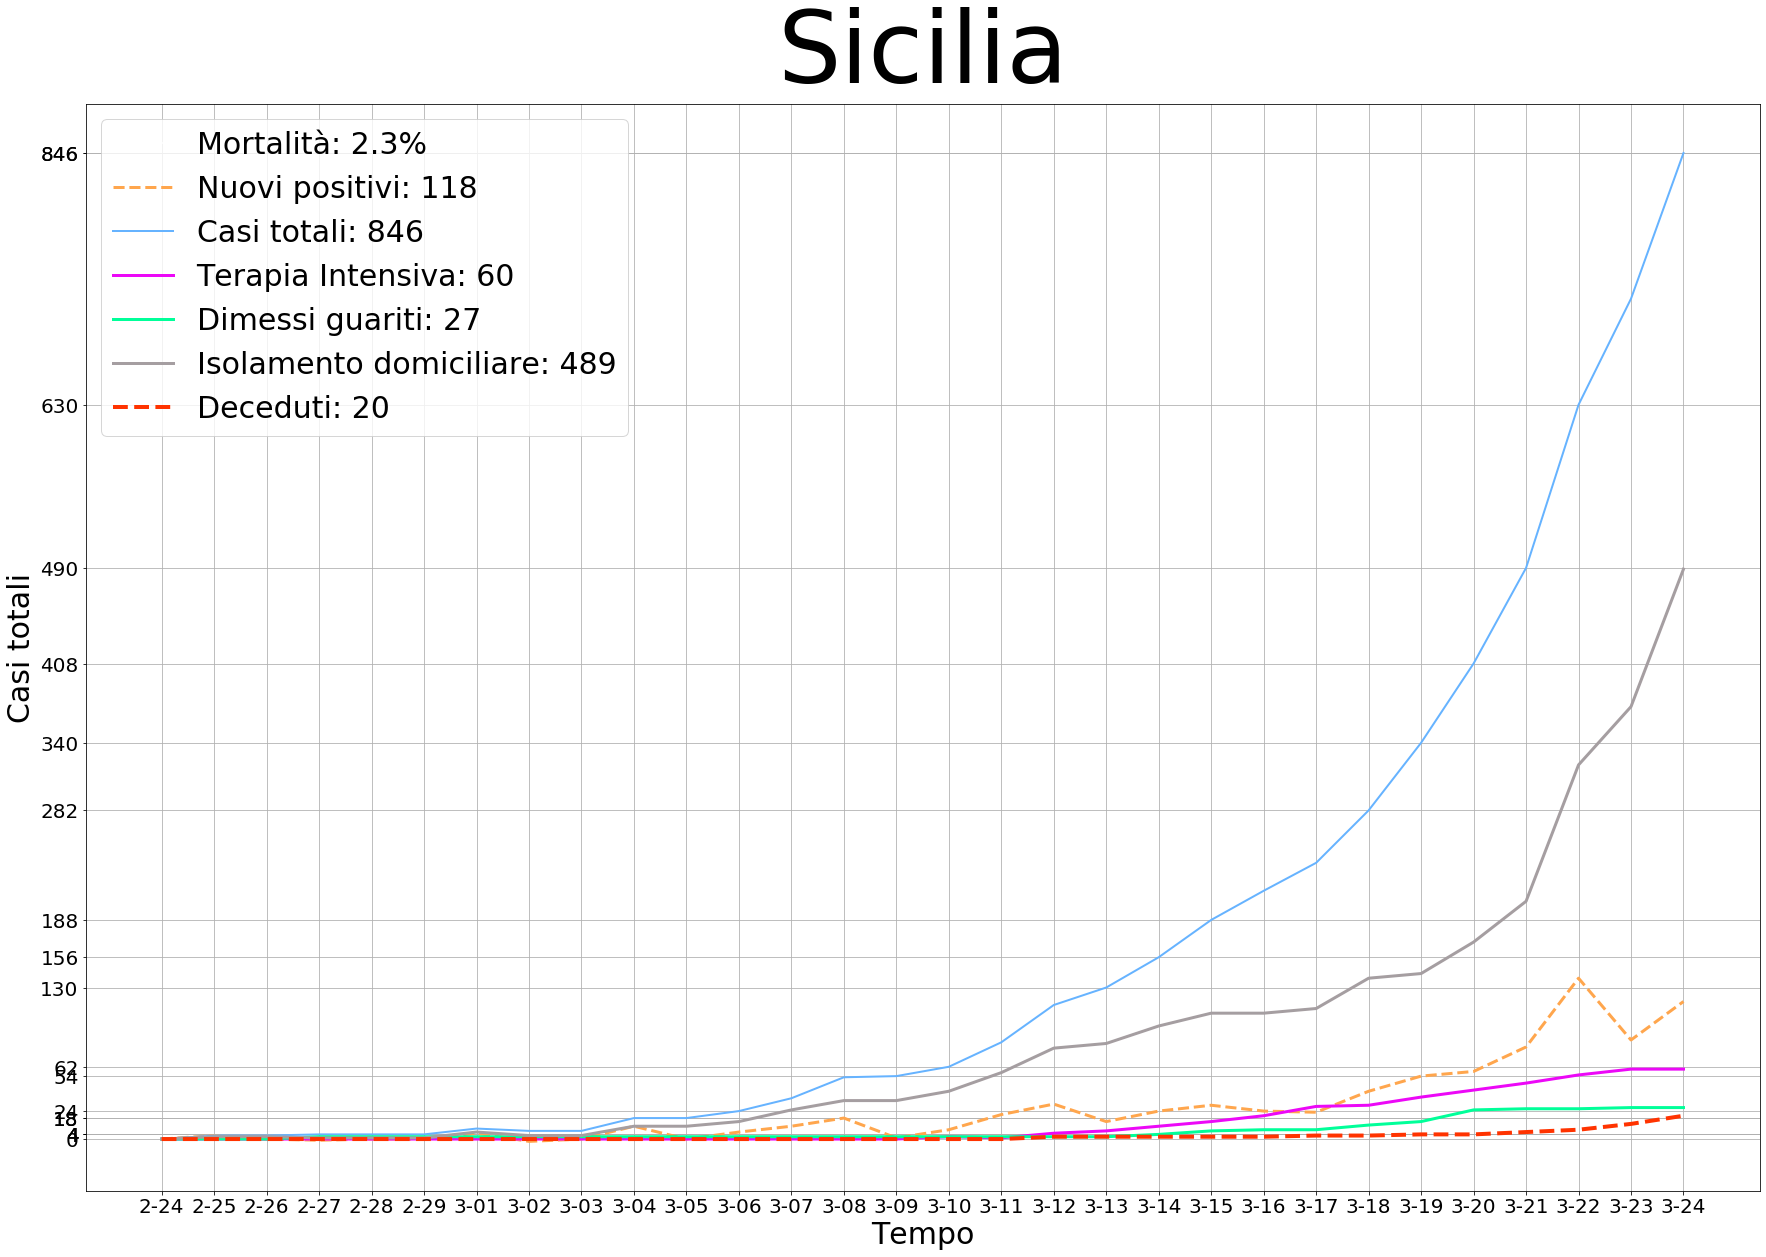

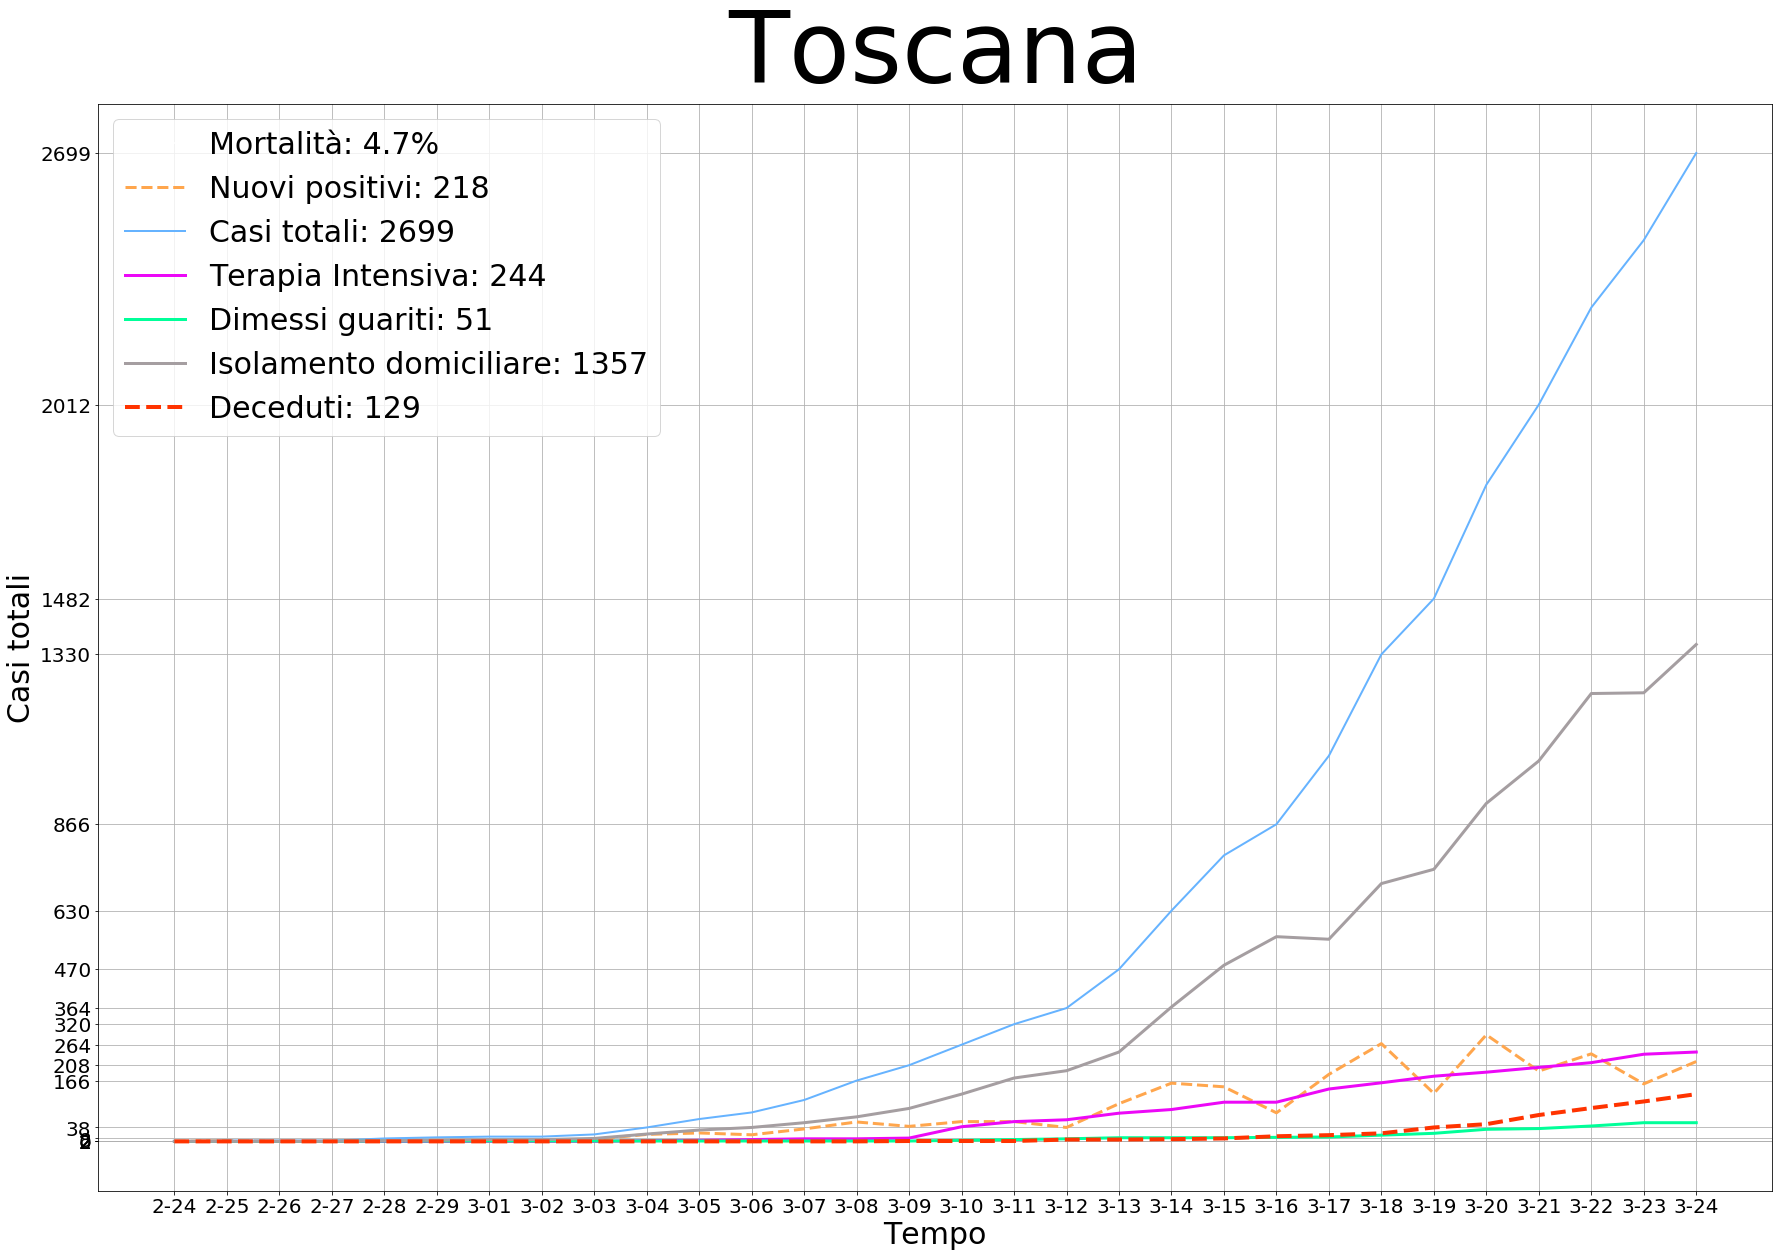

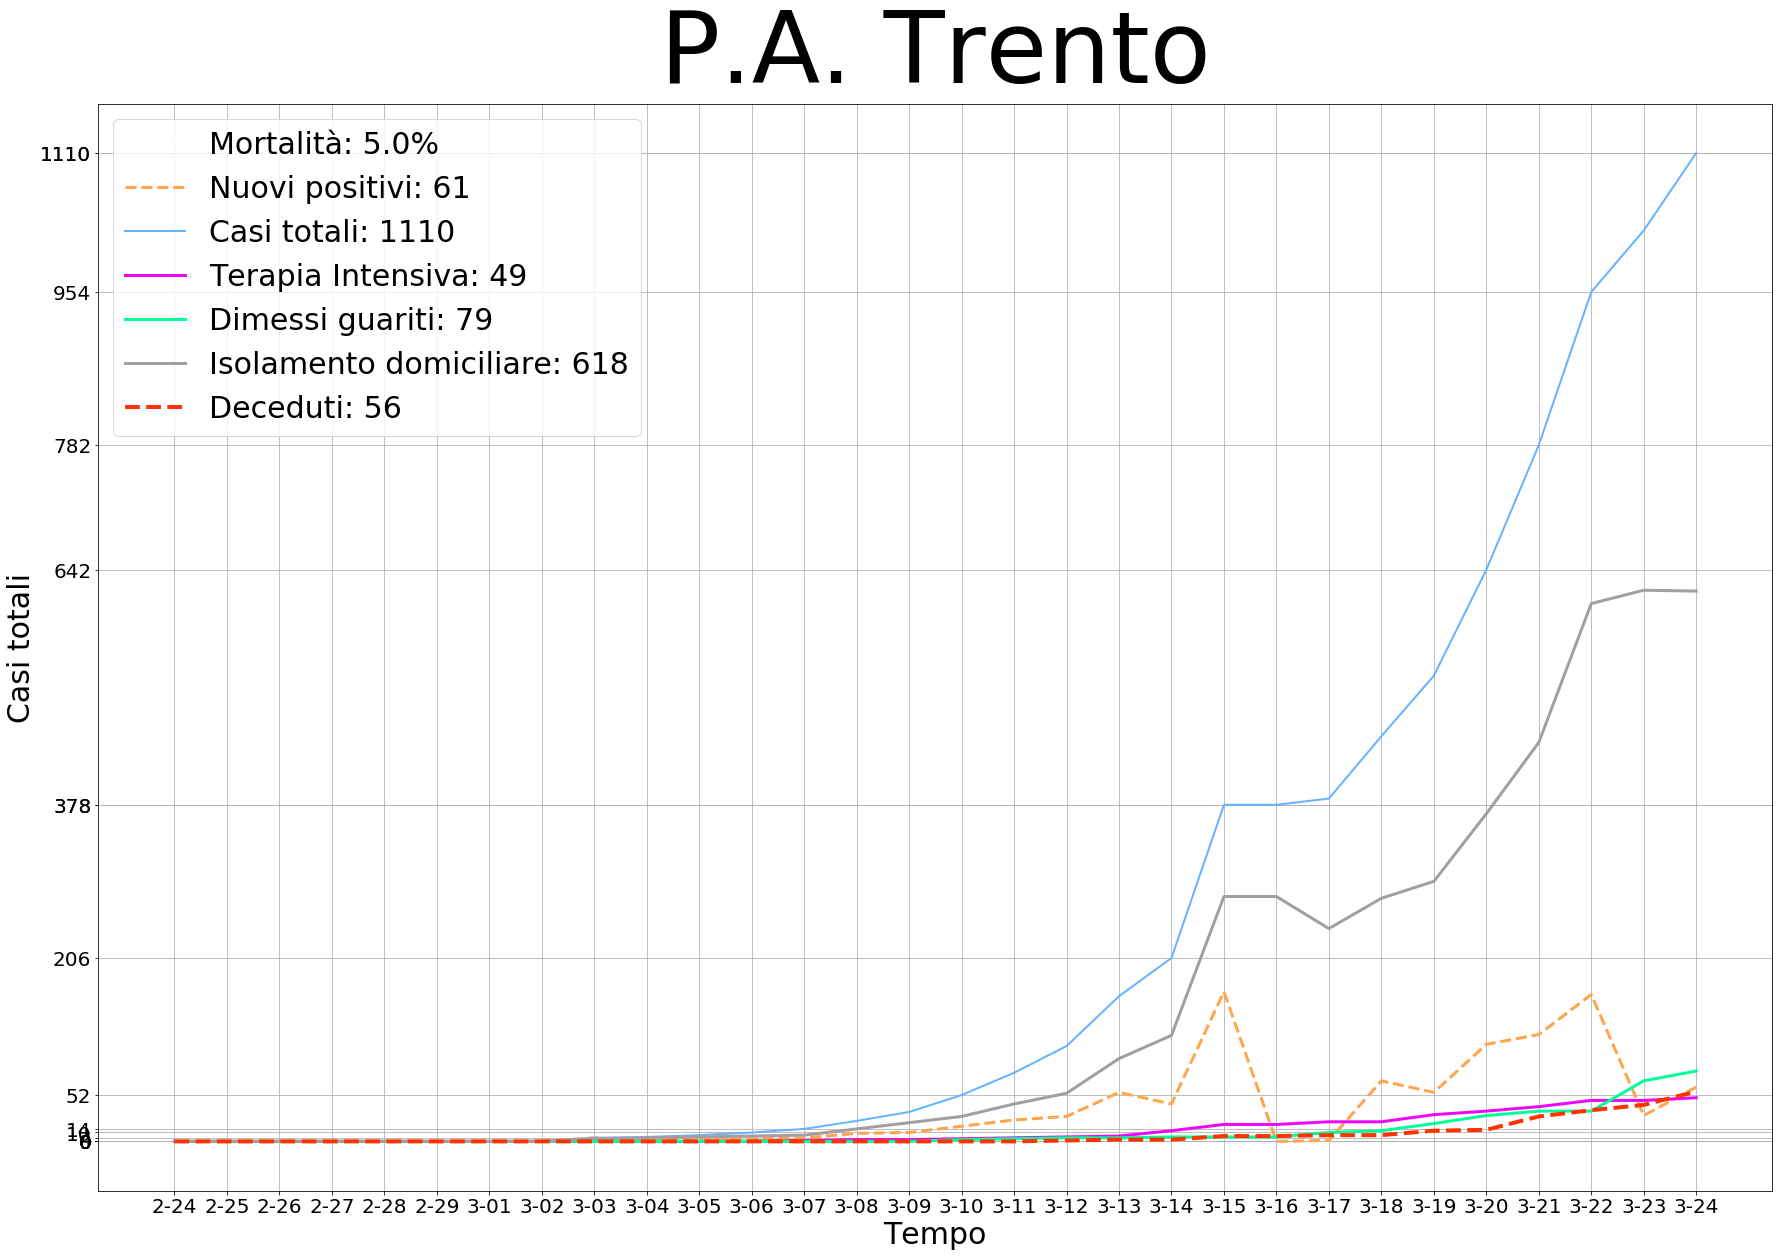

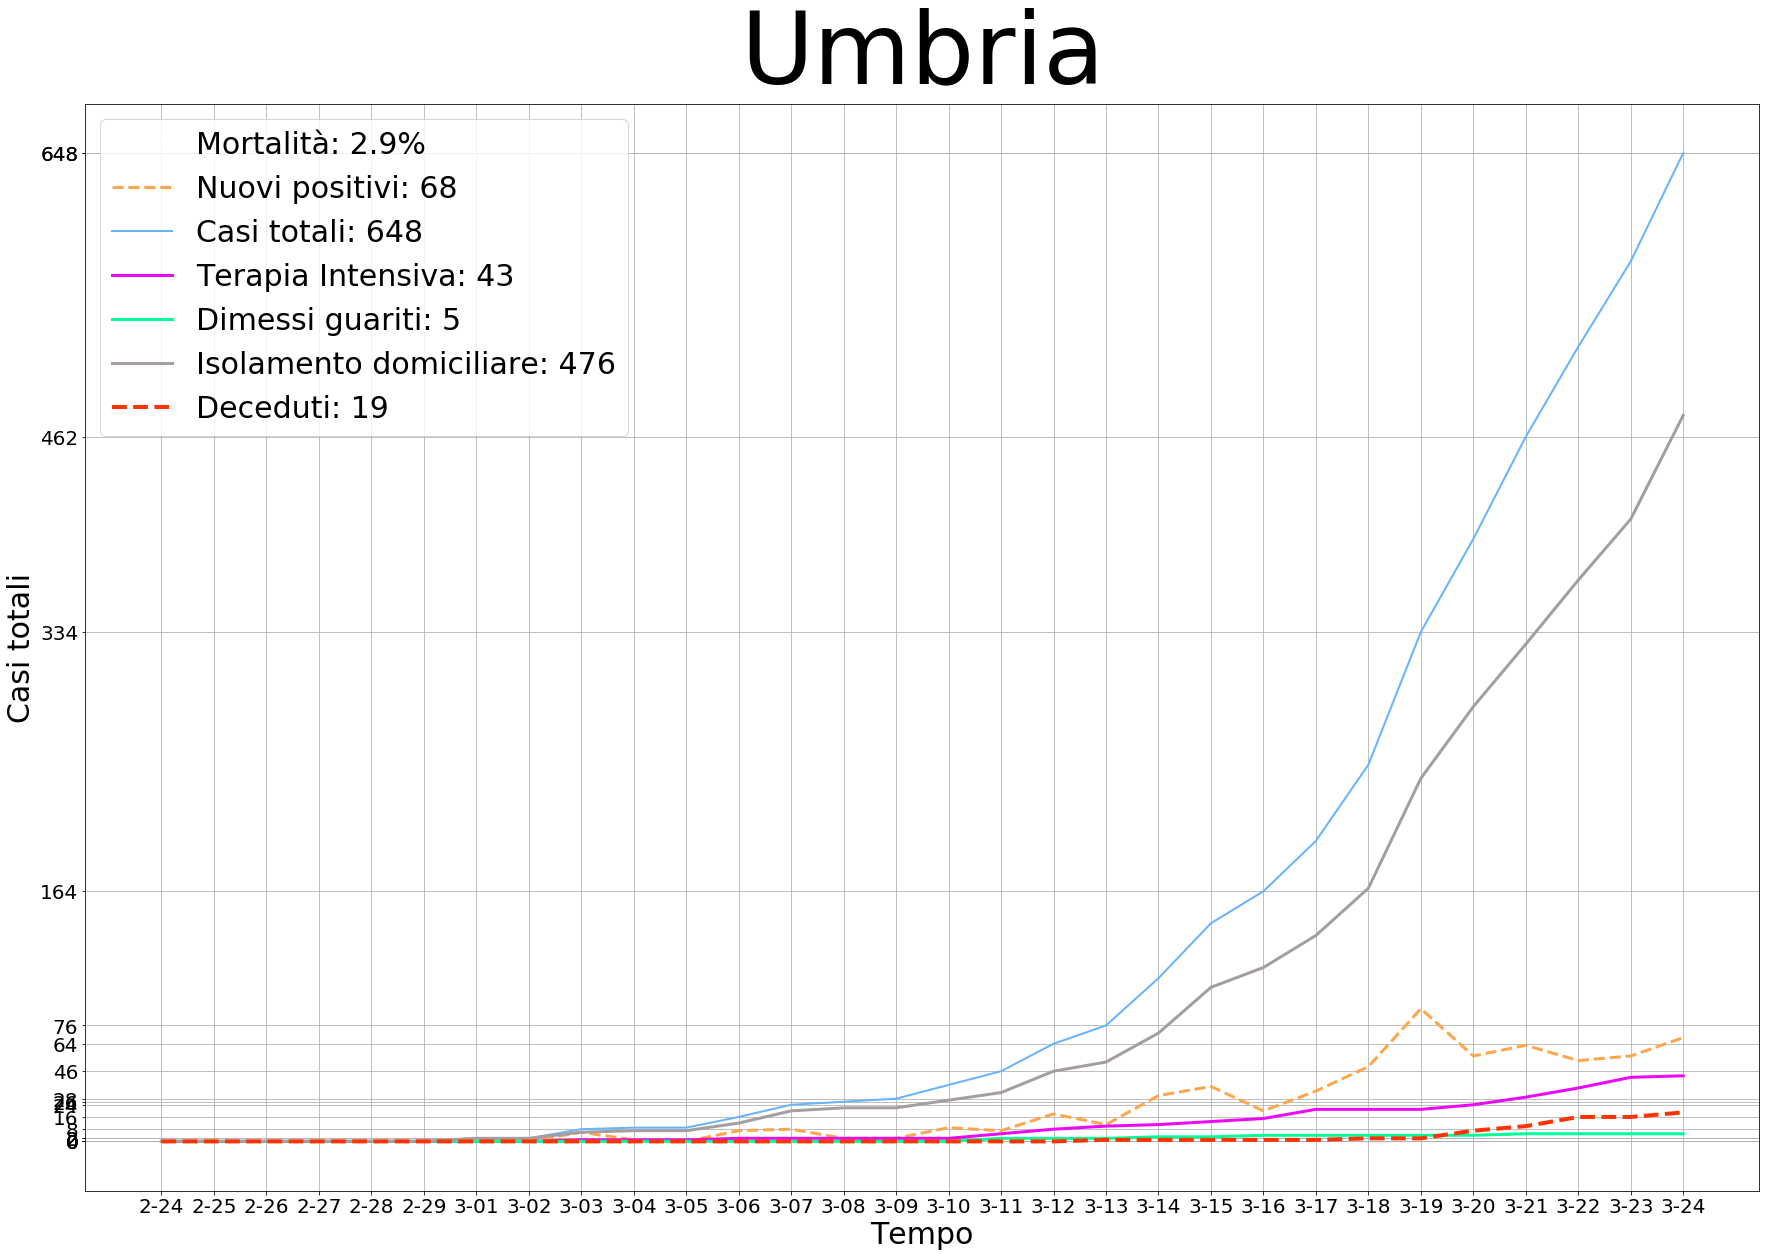

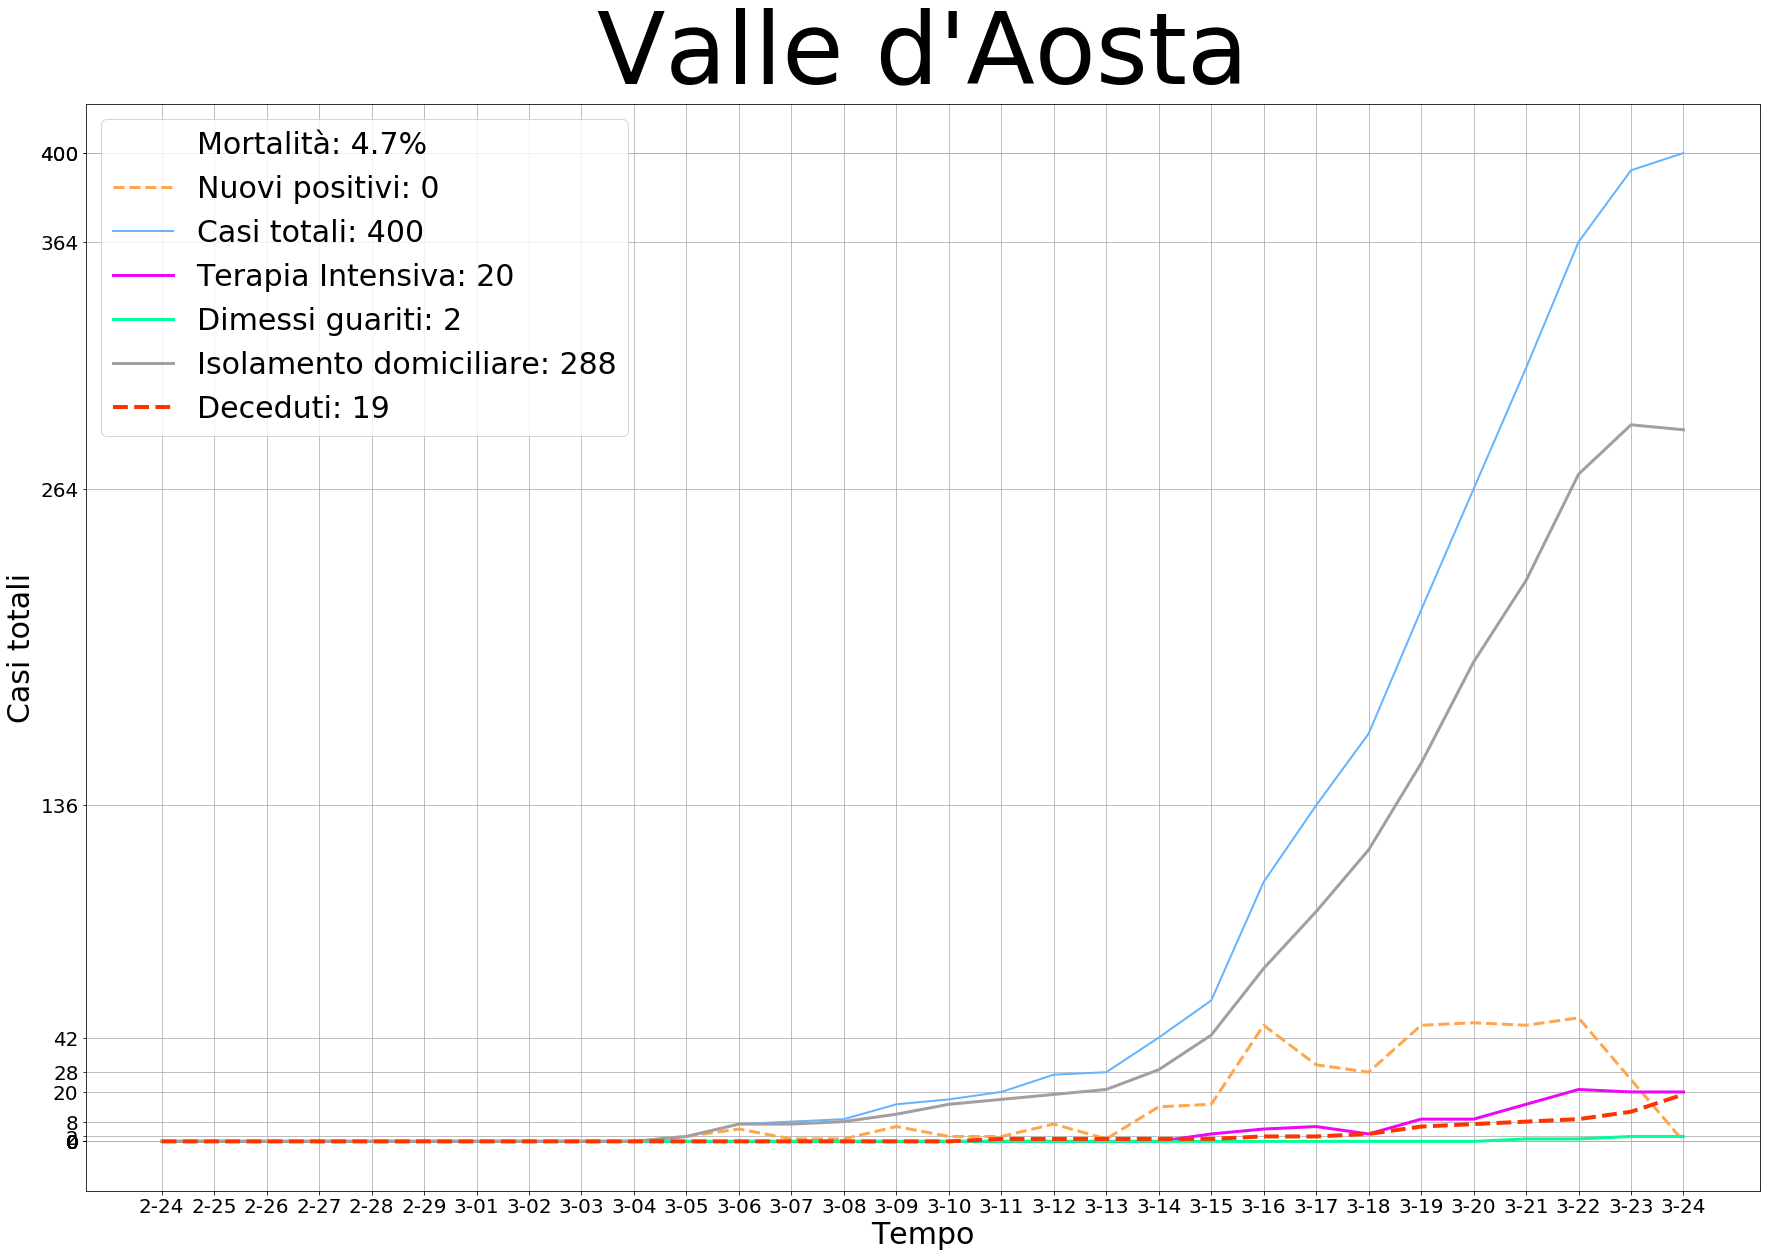

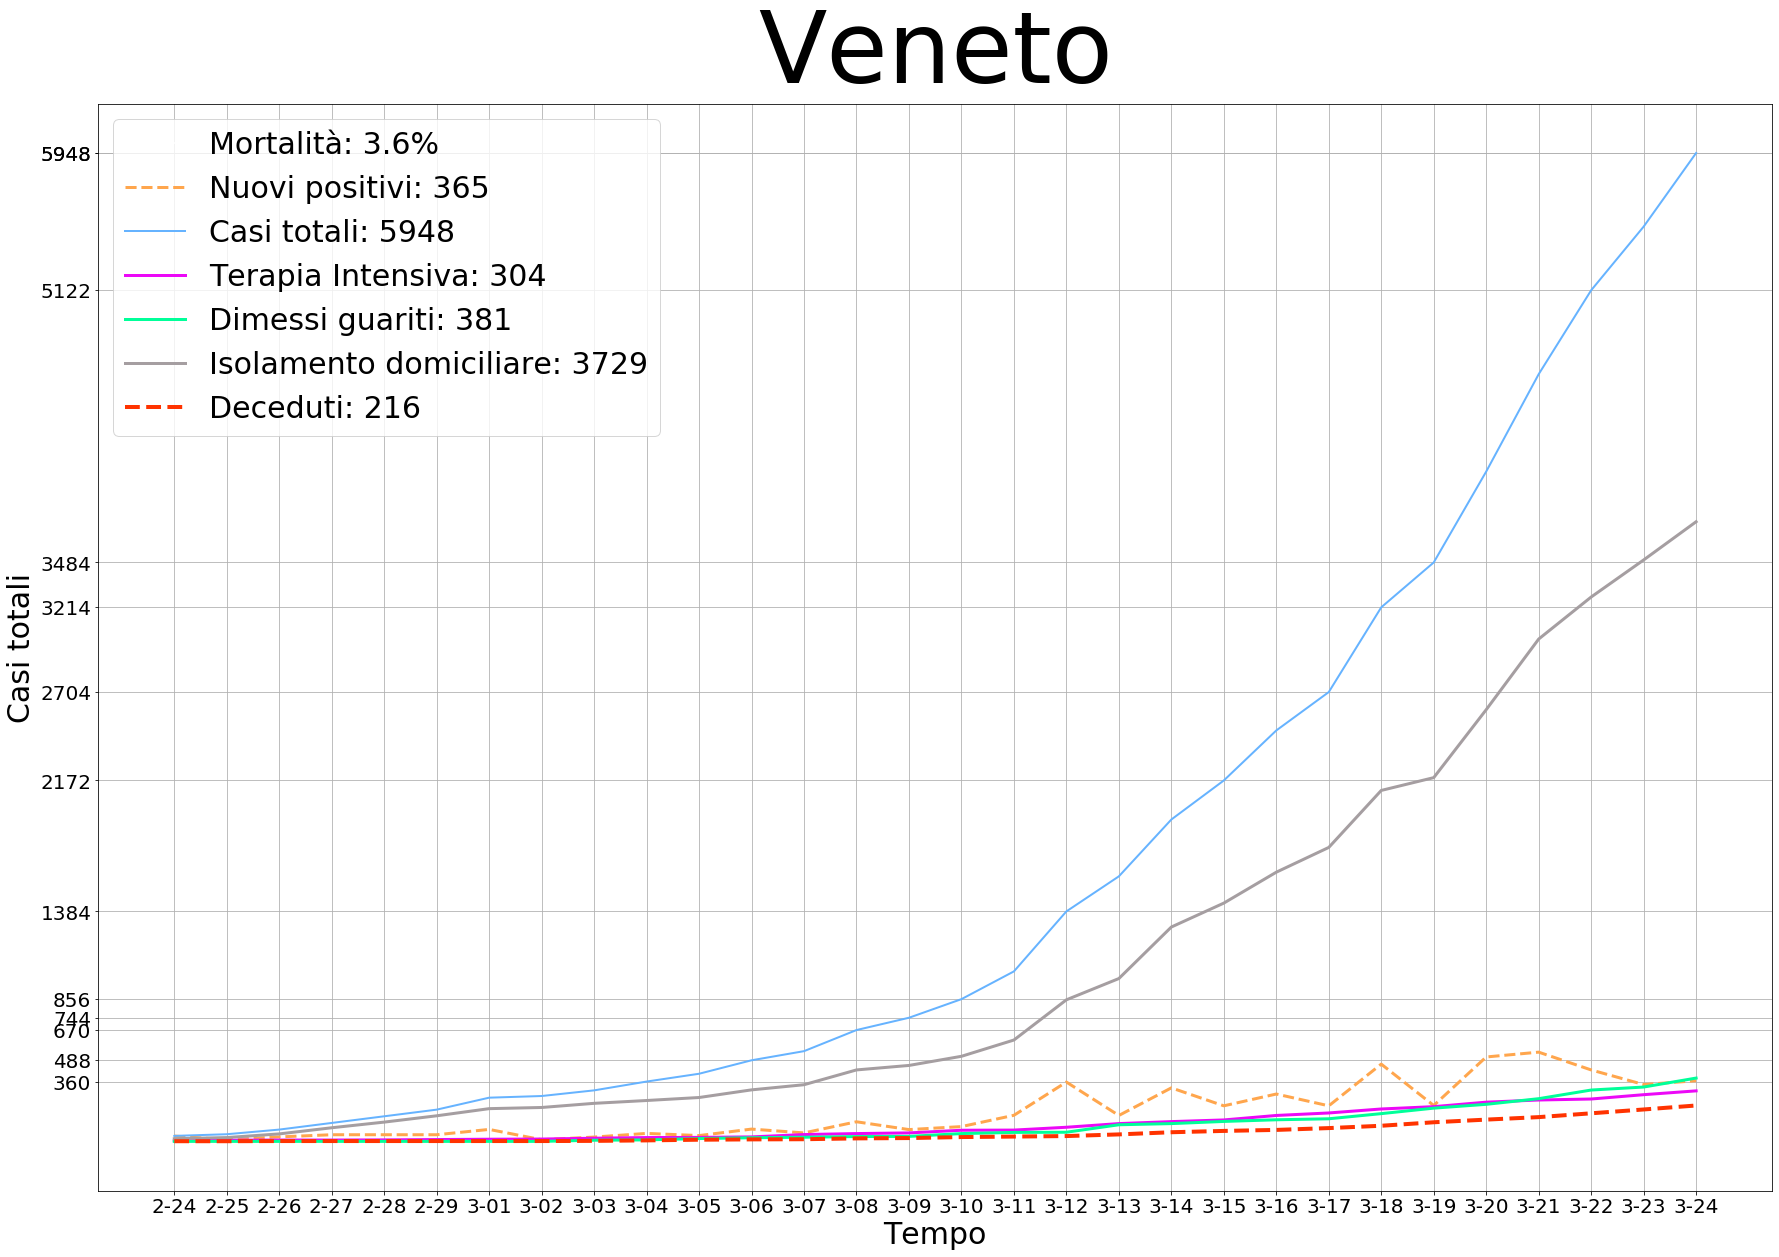

<Figure size 2160x1440 with 0 Axes>

In [23]:
# Manipolazione lista regioni per ottenere i dati raggruppati per regione.

for z in regione_tot:
    regione = df.loc[df['denominazione_regione'] == z]
    tempo = regione.data
    totale_casi = regione.totale_casi
    terapia_intensiva = regione.terapia_intensiva
    deceduti = regione.deceduti
    dimessi_guariti = regione.dimessi_guariti
    nuovi_positivi = regione.nuovi_attualmente_positivi
    iso_domic = regione.isolamento_domiciliare


# Creazioni liste che mi serviranno per formattare le label della legenda, oltre ad essere più flessibili.

    x = []
    for f in tempo:
        x.append(f[6:10])
    
    legenda_casi_totali = []
    for casi in totale_casi:
        legenda_casi_totali.append(casi)
    
    legenda_terapia_intensiva = []
    for casi in terapia_intensiva:
        legenda_terapia_intensiva.append(casi)
        
    legenda_deceduti = []
    for casi in deceduti:
        legenda_deceduti.append(casi)
    
    legenda_guariti = []
    for casi in dimessi_guariti:
        legenda_guariti.append(casi)
    
    legenda_nuovi_positivi = []
    for casi in nuovi_positivi:
        legenda_nuovi_positivi.append(casi)
    
    legenda_iso_domic = []
    for domic in iso_domic:
        legenda_iso_domic.append(domic)
    

# C'è sicuramente un modo più elegante. Credo due liste per poter plottare tutto in base a casi totali, 
# mostrare solo i numeri pari e l'ultimo elemento della lista.    
    
    ticks = []
    ticks_1 = []
    for w in legenda_casi_totali:
        if w % 2 == 0:
            ticks.append(w)
        else:
            pass
    
    ticks_1.append(legenda_casi_totali[-1])
    ticks.extend(ticks_1)
    

    plt.rcParams["figure.figsize"]=30,20
    
    plt.rc('ytick', labelsize=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('axes', labelsize=30)
    
    plt.title("{}".format(z), fontsize=100)
    
    plt.yticks(ticks)
    
    plt.xlabel("Tempo")
    plt.ylabel("Casi totali")
    
    toll_1_tot = int(legenda_casi_totali[-1])
    toll_2_tot = int(legenda_deceduti[-1])
    death_toll = (toll_2_tot/toll_1_tot)*100
    conv_deth_toll = str(death_toll)

    plt.plot(death_toll, color='#FFFFFF', label="Mortalità: {}%".format(conv_deth_toll[:3]))
    plt.plot(x, nuovi_positivi, color="#ffa64d", linewidth=3, linestyle="--", label="Nuovi positivi: {}".format(legenda_nuovi_positivi[-1]))
    plt.plot(x,totale_casi, color='#66b3ff', linewidth=2, label='Casi totali: {}'.format(legenda_casi_totali[-1]))
    plt.plot(x,terapia_intensiva, color='#EC08F7', linewidth=3, label='Terapia Intensiva: {}'.format(legenda_terapia_intensiva[-1]))
    plt.plot(x,dimessi_guariti, color='#00ff99', linewidth=3, label='Dimessi guariti: {}'.format(legenda_guariti[-1]))
    plt.plot(x, iso_domic, color="#A59EA1", linewidth=3, label='Isolamento domiciliare: {}'.format(legenda_iso_domic[-1]))
    plt.plot(x,deceduti, color='#ff3300', linestyle="--", linewidth=4, label='Deceduti: {}'.format(legenda_deceduti[-1]))
    plt.legend(prop={'size': 30})
    plt.grid()
    
    # Togliendo il commento tutti i grafici verranno salvati in formato .png in locale. Creare nella stessa cartella del notebook
    # una cartella rinominadola: Estrazioni_reg
    
    # plt.savefig('Estrazioni_reg/{}.png'.format(z))
    plt.show()
    plt.clf()


# Andamento Nazionale

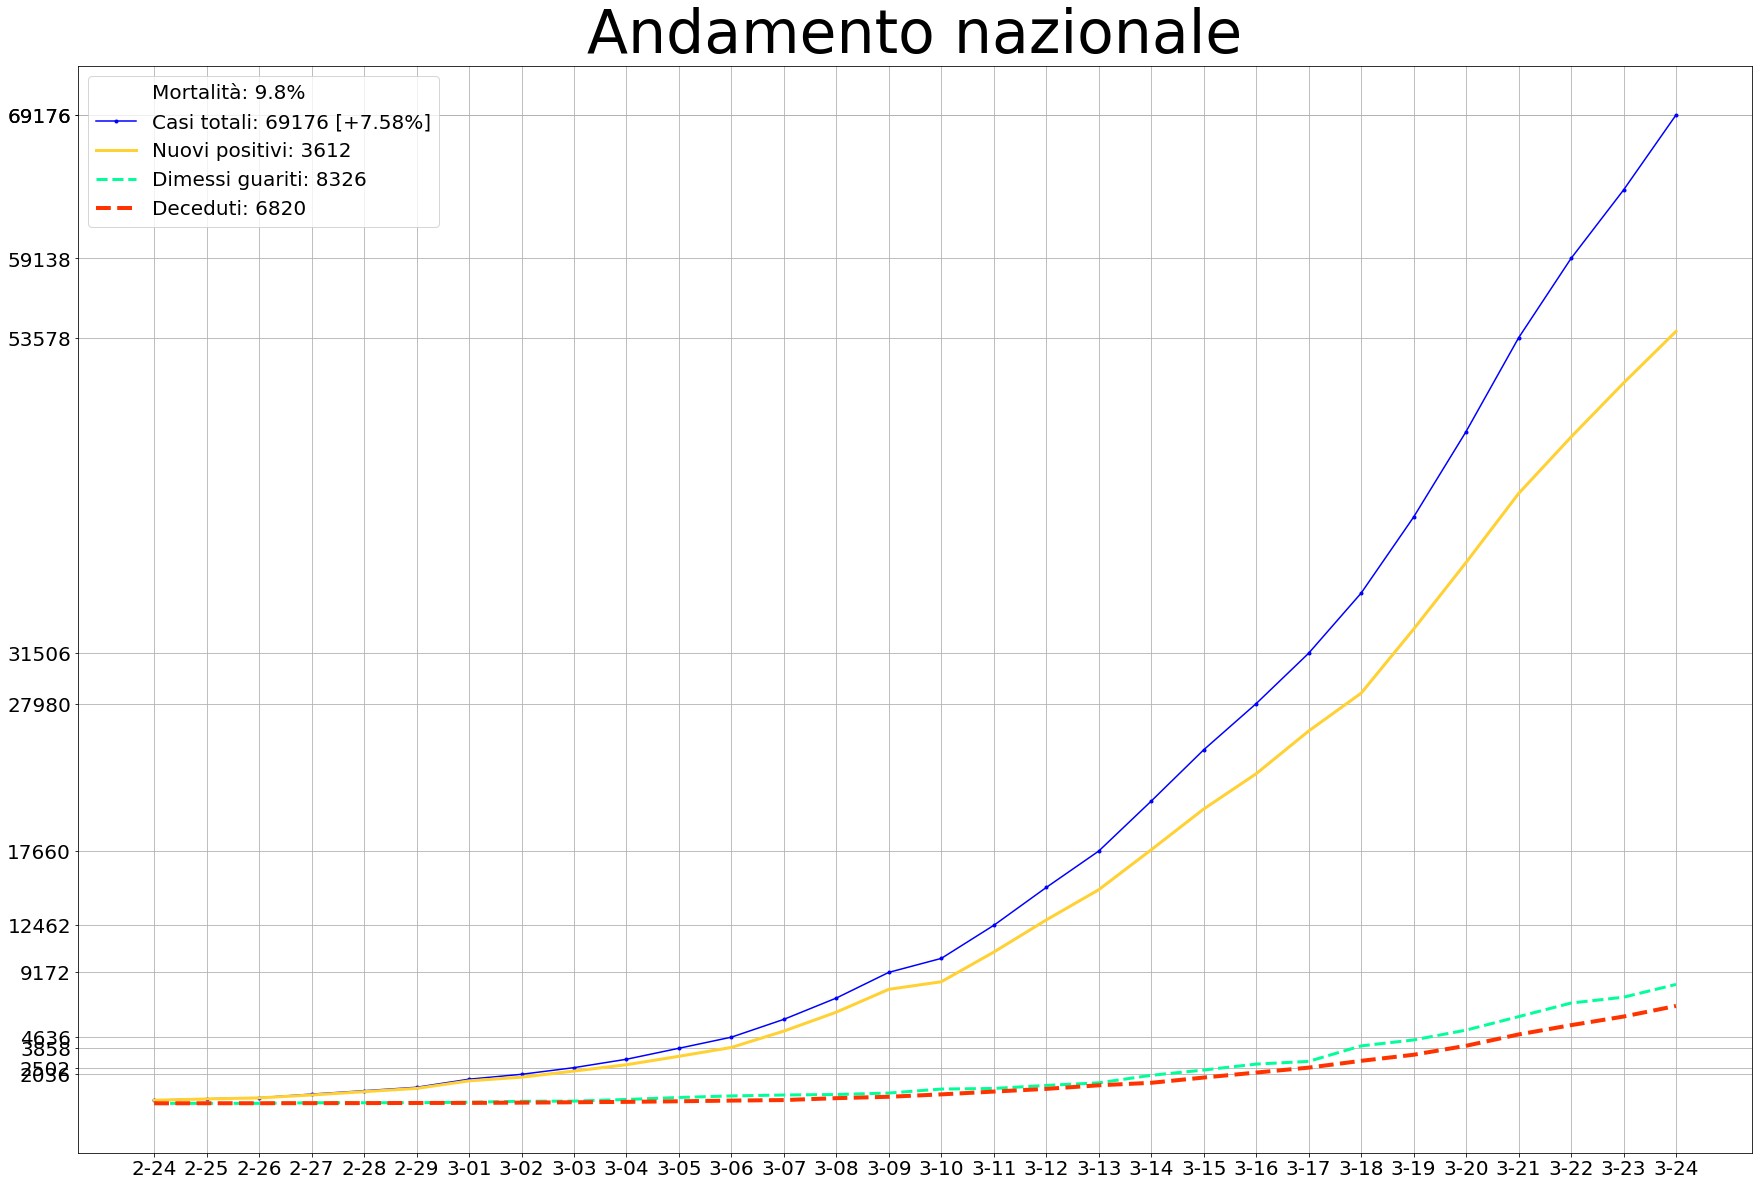

In [24]:
tempo_nazionale = df_nazionale.data

totale_casi = df_nazionale.totale_casi
nuovi_positivi = df_nazionale.totale_attualmente_positivi
totale_deceduti = df_nazionale.deceduti
totale_guariti = df_nazionale.dimessi_guariti

x = []
for f in tempo_nazionale:
    x.append(f[6:10])

tot_nuovi_postivi = []
tot_deceduti = []
tot_guariti = []
casi_totali = []



for p in totale_casi:
    casi_totali.append(p)

for w1 in nuovi_positivi:
    tot_nuovi_postivi.append(w1)

for w2 in totale_guariti:
    tot_guariti.append(w2)

for w3 in totale_deceduti:
    tot_deceduti.append(w3)
    

ticks = []
ticks_1 = []
for w in totale_casi:
    if w % 2 == 0 and w > 2000:
        ticks.append(w)
    else:
        pass
    
    

    
ticks_1.append(casi_totali[-1])
ticks.extend(ticks_1)


incremento_casi = int(casi_totali[-1])- int(casi_totali[-2])

percentuale = (incremento_casi * 100) / casi_totali[-1]
conv_percen_1 = str(percentuale) 
conv_percen_2 = conv_percen_1[:4]

if percentuale > 0:
    final_perc = "+" + conv_percen_2 + "%"
else:
    final_perc = "-" + conv_percen_2 + "%"

plt.yticks(ticks)

plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=10)

plt.rcParams["figure.figsize"]=20,20

toll_1_tot = int(casi_totali[-1])
toll_2_tot = int(tot_deceduti[-1])

death_toll = (toll_2_tot/toll_1_tot)*100
conv_deth_toll = str(death_toll)

plt.plot(death_toll, color='#FFFFFF', label="Mortalità: {}%".format(conv_deth_toll[:3]))
plt.plot(x, totale_casi, 'b.-',label='Casi totali: {} [{}]'.format(casi_totali[-1], final_perc))
plt.plot(x, nuovi_positivi, color='#FFD133', linewidth=3, label="Nuovi positivi: {}".format(int(tot_nuovi_postivi[-1])- int(tot_nuovi_postivi[-2])))
plt.plot(x, totale_guariti, color='#00ff99', linestyle="--", linewidth=3, label='Dimessi guariti: {}'.format(tot_guariti[-1]))
plt.plot(x, totale_deceduti, color='#ff3300', linestyle="--", linewidth=4, label='Deceduti: {}'.format(tot_deceduti[-1]))

plt.title("Andamento nazionale", fontsize=60)
plt.legend(prop={'size': 20})
plt.grid()

# Comparazione Cina vs Italia vs Spagna vs Germania

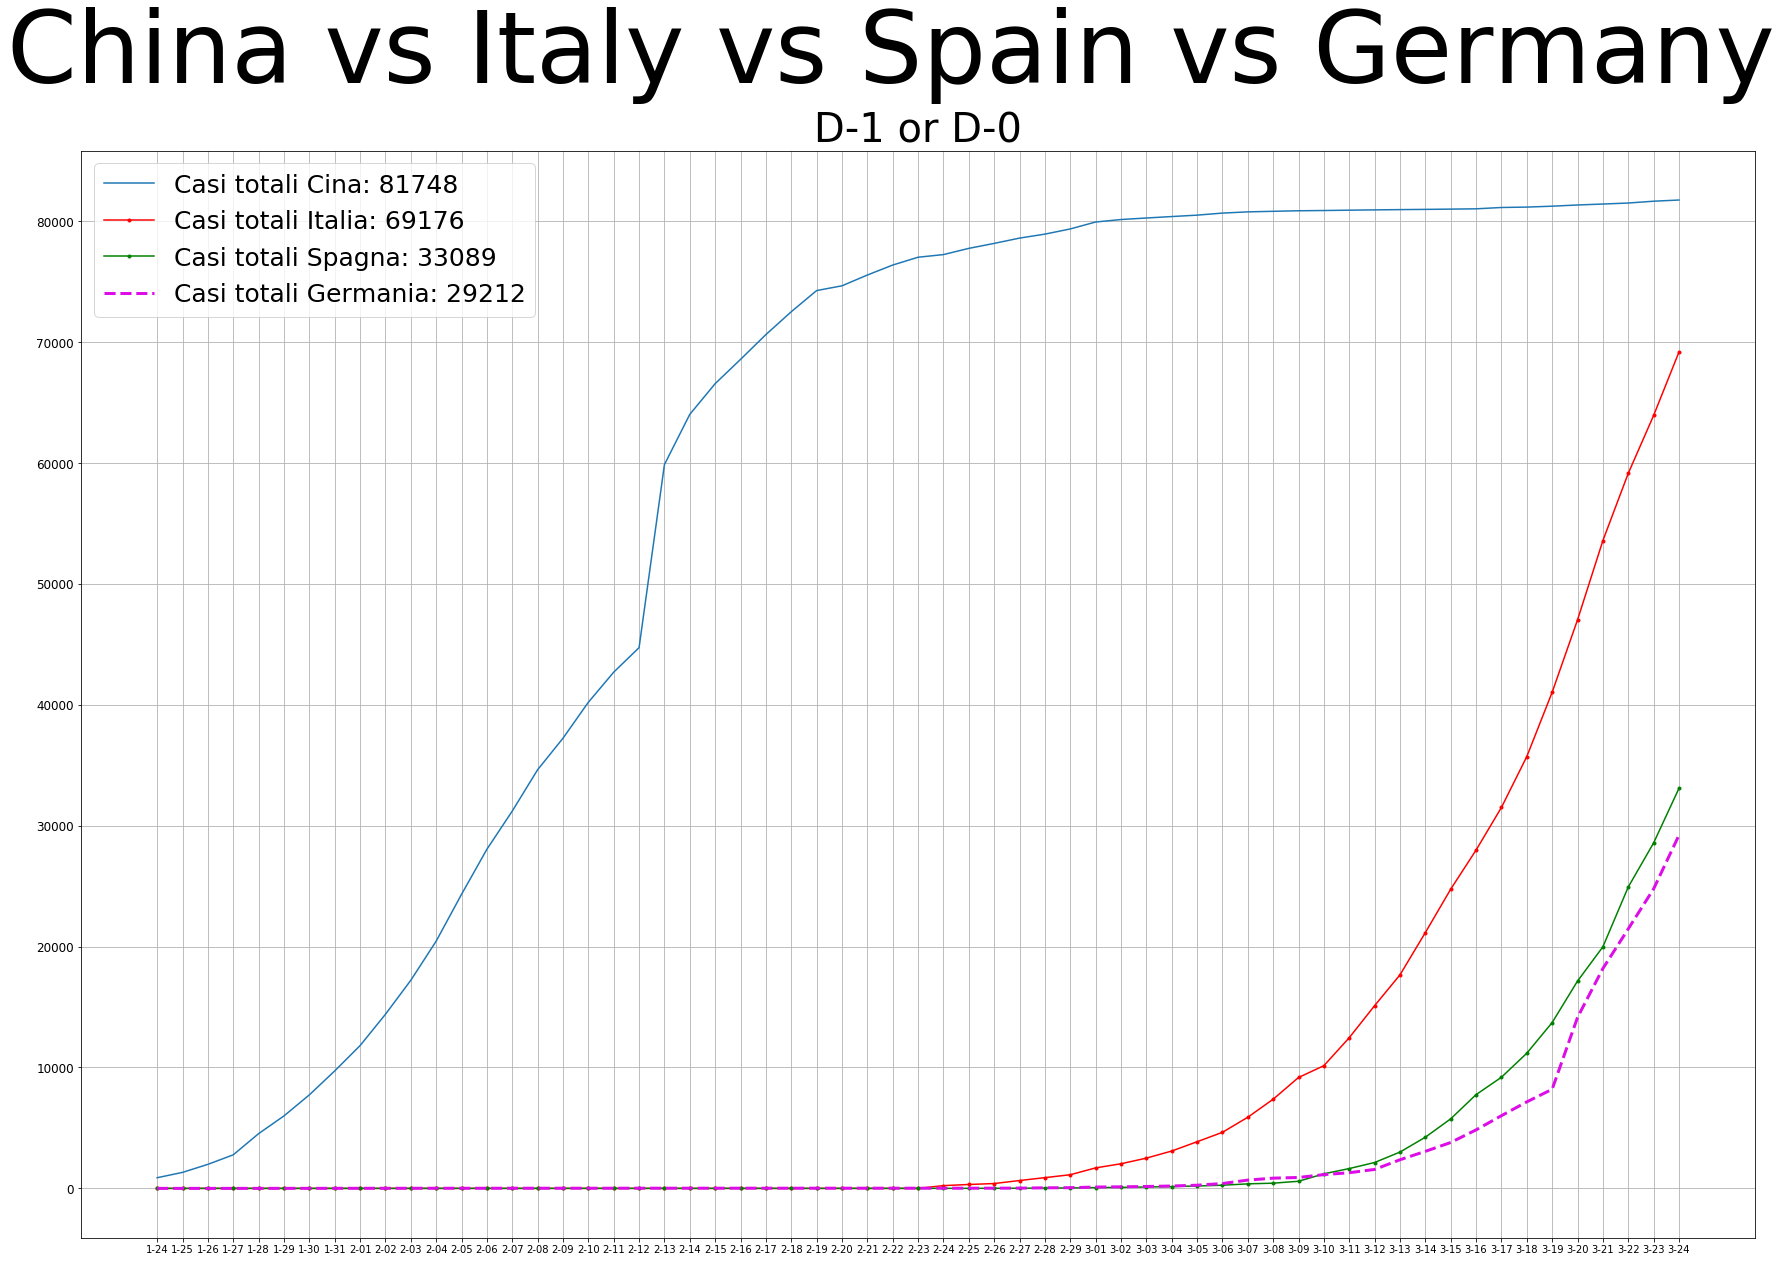

In [25]:
cina_totale = df_cina.loc[df_cina['location'] == 'China']

spain_totale = df_cina.loc[df_cina['location'] == 'Spain']

gremania_totale = df_cina.loc[df_cina['location'] == 'Germany']

cina_casi_totale = cina_totale.total_cases

cina_adapt_total = []

for t in cina_casi_totale:
    cina_adapt_total.append(t)

total_cases_cina_conv = cina_adapt_total


italy_adapt = []

for sempo in cina_totale.date:
    italy_adapt.append(sempo[6:10])

comp = 0

deviatio = []

for pop in totale_casi:
    deviatio.append(pop)

for _ in range(55):
    deviatio.insert(0,comp)

spain = []
for x in spain_totale.total_cases:
    spain.append(x)

for _ in range(0):
    spain.insert(0, comp)
    
germania = []
for x in gremania_totale.total_cases:
    germania.append(x)

for _ in range(0):
    germania.insert(0, comp)

    
nuovi_casi = casi_totali

plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=10)

plt.rcParams["figure.figsize"]=30,20

plt.plot(italy_adapt[24:], total_cases_cina_conv[24:], label='Casi totali Cina: {}'.format(cina_adapt_total[-1]))    
plt.plot(italy_adapt[24:], deviatio[24:], 'r.-',label='Casi totali Italia: {}'.format(casi_totali[-1]))
plt.plot(italy_adapt[24:], spain[24:], 'g.-',label='Casi totali Spagna: {}'.format(spain[-1]))
plt.plot(italy_adapt[24:], germania[24:], color="#DC0DE6",linestyle="--",linewidth=3,label='Casi totali Germania: {}'.format(germania[-1]))

#plt.fill_between(italy_adapt[24:], total_cases_cina_conv[24:])
#plt.fill_between(italy_adapt[24:], deviatio[24:])

plt.suptitle("China vs Italy vs Spain vs Germany", fontsize=100)
plt.title("D-1 or D-0", fontsize=40)
plt.legend()
plt.legend(prop={'size': 25})
plt.grid()